###  Day1

In [1]:
!pip install opencv-python

In [2]:
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import torch 
from torch import flatten
import torch.nn as nn
from torch.nn import Module,Conv2d,Linear,MaxPool2d,ReLU,Softmax
import matplotlib.pyplot as plt
import plotly.express as px
import scipy as sp
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import shutil
import random
from PIL import Image

###  Day2

In [ ]:
#Burada jpeg veya webp formatında kaydolmus gorselleri jpg formatına donusturup cat_1,dog_1,bird_1 seklınde kaydettım
import os
import re
path ="enter your path"
files = os.listdir(path)
valid_ext = (".jpeg", ".webp", ".jpg")
existing_numbers = []
for f in files:
    match = re.match(r"bird_(\d+)\.jpg", f)
    if match:
        existing_numbers.append(int(match.group(1)))
counter = max(existing_numbers, default=0) + 1
for file in files:
    if file.lower().endswith(valid_ext) and not file.startswith("bird_"):
        old_path = os.path.join(path, file)
        new_path = os.path.join(path, f"bird_{counter}.jpg")
        img = Image.open(old_path).convert("RGB")
        img.save(new_path, "JPEG")
        os.remove(old_path)
        counter += 1

print("Yeni dosyalar numaralandırıldı, eskiler korunarak devam edildi!")

Yeni dosyalar numaralandırıldı, eskiler korunarak devam edildi!


In [ ]:
import os
path = r"enter your path"
files = os.listdir(path)
valid_ext = (".jpeg", ".webp", ".jpg")
existing_numbers = []
for f in files:
    match = re.match(r"cat_(\d+)\.jpg", f)
    if match:
        existing_numbers.append(int(match.group(1)))
counter = max(existing_numbers, default=0) + 1
for file in files:
    if file.lower().endswith(valid_ext) and not file.startswith("cat_"):
        old_path = os.path.join(path, file)
        new_path = os.path.join(path, f"cat{counter}.jpg")
        img = Image.open(old_path).convert("RGB")
        img.save(new_path, "JPEG")
        os.remove(old_path)
        counter += 1

print("Yeni dosyalar numaralandırıldı, eskiler korunarak devam edildi!")


Yeni dosyalar numaralandırıldı, eskiler korunarak devam edildi!


In [ ]:
import os
path = r"enter your path"
files = os.listdir(path)
valid_ext = (".jpeg", ".webp", ".jpg")
existing_numbers = []
for f in files:
    match = re.match(r"dog_(\d+)\.jpg", f)
    if match:
        existing_numbers.append(int(match.group(1)))
counter = max(existing_numbers, default=0) + 1
for file in files:
    if file.lower().endswith(valid_ext) and not file.startswith("dog_"):
        old_path = os.path.join(path, file)
        new_path = os.path.join(path, f"dog{counter}.jpg")
        img = Image.open(old_path).convert("RGB")
        img.save(new_path, "JPEG")
        os.remove(old_path)
        counter += 1

print("Yeni dosyalar numaralandırıldı, eskiler korunarak devam edildi!")


Yeni dosyalar numaralandırıldı, eskiler korunarak devam edildi!


In [ ]:
#Burada source file daki gorselleri aldım ve eger yoksa datasetın ıcıne traın ve test dosyları actım !!!sadece 1 kere calıstırılacak
"""
source_folder_dog = "enter your path"
train_folder_dog = r""enter your path"
test_folder_dog = r"enter your path"
val_folder_dog = r"enter your path"
os.makedirs(train_folder_dog, exist_ok=True)
os.makedirs(test_folder_dog, exist_ok=True)
os.makedirs(val_folder_dog, exist_ok=True)

"-----------------------------------------------------------------------------------------------------------------------------------------"
source_folder_cat = r"enter your path"
train_folder_cat = r"enter your path"
test_folder_cat = r"enter your path"
val_folder_cat = r"enter your path"
os.makedirs(train_folder_cat, exist_ok=True)
os.makedirs(test_folder_cat, exist_ok=True)
os.makedirs(val_folder_cat, exist_ok=True)

"-----------------------------------------------------------------------------------------------------------------------------------------"
source_folder_bird = r"enter your path"
train_folder_bird = rr"enter your path"
test_folder_bird = r"enter your path"
val_folder_bird = r"enter your path"
os.makedirs(train_folder_bird, exist_ok=True)
os.makedirs(test_folder_bird, exist_ok=True)
os.makedirs(val_folder_bird, exist_ok=True)

"-----------------------------------------------------------------------------------------------------------------------------------------"
#Burada kaynak dosyanın ıcıne gırerek ıcındekı gorsellerı lısteye donusturdum
files_dog = []
for f in os.listdir(source_folder_dog):
    if f.lower().endswith(".jpg") or f.lower().endswith(".jpeg") or f.lower().endswith(".png"):
        files_dog.append(f)
random.shuffle(files_dog)

files_cat = []
for f in os.listdir(source_folder_cat):
    if f.lower().endswith(".jpg") or f.lower().endswith(".jpeg") or f.lower().endswith(".png"):
        files_cat.append(f)
random.shuffle(files_cat)

files_bird = []
for f in os.listdir(source_folder_bird):
    if f.lower().endswith(".jpg") or f.lower().endswith(".jpeg") or f.lower().endswith(".png"):
        files_bird.append(f)
random.shuffle(files_bird)

"-----------------------------------------------------------------------------------------------------------------------------------------"
#Burada test %20,val test cıkarıldıktan sonrakı %20 yani %16  ve train olarak kedi kopek ve kusları ayırdım
split_point_test_dog = int(len(files_dog) * 0.2)
split_point_val_dog = int((len(files_dog) - split_point_test_dog) * 0.2)

split_point_test_cat = int(len(files_cat) * 0.2)
split_point_val_cat = int((len(files_cat) - split_point_test_cat) * 0.2)

split_point_test_bird = int(len(files_bird) * 0.2)
split_point_val_bird = int((len(files_bird) - split_point_test_bird) * 0.2)

test_files_dog = files_dog[:split_point_test_dog]
val_files_dog = files_dog[split_point_test_dog : split_point_test_dog + split_point_val_dog]
train_files_dog = files_dog[split_point_test_dog + split_point_val_dog :]

test_files_cat = files_cat[:split_point_test_cat]
val_files_cat = files_cat[split_point_test_cat : split_point_test_cat + split_point_val_cat]
train_files_cat = files_cat[split_point_test_cat + split_point_val_cat :]

test_files_bird = files_bird[:split_point_test_bird]
val_files_bird = files_bird[split_point_test_bird : split_point_test_bird + split_point_val_bird]
train_files_bird = files_bird[split_point_test_bird + split_point_val_bird :]


for f in train_files_dog:
    shutil.copy(os.path.join(source_folder_dog, f), os.path.join(train_folder_dog, f))
for f in val_files_dog:
    shutil.copy(os.path.join(source_folder_dog, f), os.path.join(val_folder_dog, f))
for f in test_files_dog:
    shutil.copy(os.path.join(source_folder_dog, f), os.path.join(test_folder_dog, f))


for f in train_files_cat:
    shutil.copy(os.path.join(source_folder_cat, f), os.path.join(train_folder_cat, f))
for f in val_files_cat:
    shutil.copy(os.path.join(source_folder_cat, f), os.path.join(val_folder_cat, f))
for f in test_files_cat:
    shutil.copy(os.path.join(source_folder_cat, f), os.path.join(test_folder_cat, f))


for f in train_files_bird:
    shutil.copy(os.path.join(source_folder_bird, f), os.path.join(train_folder_bird, f))
for f in val_files_bird:
    shutil.copy(os.path.join(source_folder_bird, f), os.path.join(val_folder_bird, f))
for f in test_files_bird:
    shutil.copy(os.path.join(source_folder_bird, f), os.path.join(test_folder_bird, f))


###  Day3

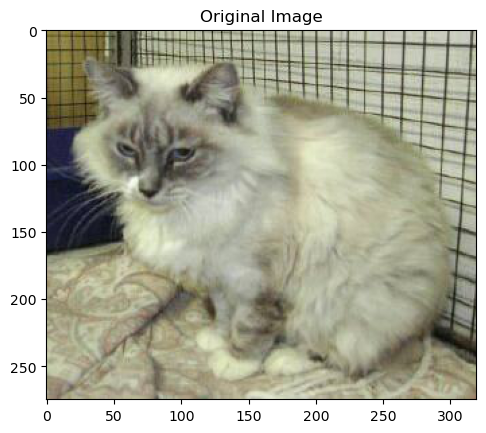

In [ ]:
#deneme ıcın yazıldı cv2 ıle okuyamadım pıl ıle okudum
image_path = r"enter your path"
pil_image = Image.open(image_path)
image = np.array(pil_image)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()


In [8]:
height, width, channels = image.shape
print("Height:", height, "Width:", width, "Channels:", channels)

for c in range(channels):
    channel_data = image[:, :, c]
    print(f"Kanal {c}: min = {channel_data.min()}, max = {channel_data.max()}")


Height: 275 Width: 320 Channels: 3
Kanal 0: min = 0, max = 243
Kanal 1: min = 7, max = 255
Kanal 2: min = 4, max = 250


In [ ]:
"""
import os
transform = transforms.Compose([transforms.ToTensor(),transforms.Resize((244,244))])

train_cat=r"enter your path"
train_dog=r"enter your path"
train_bird=r"enter your path"

test_cat=r"enter your path"
test_dog=r"enter your path"
test_bird=r"enter your path"

val_cat=r"enter your path"
val_dog=r"enter your path"
val_bird=r"enter your path"

folders = [train_cat, train_dog, train_bird, test_cat, test_dog, test_bird,val_cat,val_dog,val_bird]
count=0
for folder in folders:
    for f in os.listdir(folder):
        file_path = os.path.join(folder, f)
        if f.lower().endswith((".jpg", ".jpeg",".webp")):
            print("-------------------------------------")
            
            img = Image.open(file_path).convert("RGB")
            img_tensor = transform(img)  
            img_resized = transforms.ToPILImage()(img_tensor)
            img_resized.save(file_path)
            
            height, width = img_resized.size
            pixels = np.array(img_resized).astype(np.float32)
            pixels_normalized = pixels / 255.0
            print(f"Resim: {f}")
            print(f"  Min piksel değeri (normalizasyon öncesi): {pixels.min()}")
            print(f"  Min piksel değeri (normalizasyon sonrası): {pixels_normalized.min()}")
            print(f"  Max piksel değeri (normalizasyon öncesi): {pixels.max()}")
            print(f"  Max piksel değeri (normalizasyon sonrası): {pixels_normalized.max()}")
            print(height, width)
            print("-------------------------------------")
            count+=1
print(count)



In [32]:
""""eski augmentation code
def add_gaussian_noise_pil(pil_img, mean=0, sigma=10):
    arr = np.array(pil_img).astype(np.float32) 
    #mean ± 3*sigma aralığında -30 ile +30 yani.
    gauss = np.random.normal(mean, sigma, arr.shape).astype(np.float32)
    noisy = arr + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy)

def apply_blur_pil(pil_img, ksize=3):
    # kernel boyutu tek sayı olmalı
    if ksize % 2 == 0:
        ksize += 1
    arr = np.array(pil_img).astype(np.uint8)
    # 0 standart sapma. 0 verirsek sigma değerini ksize’a göre otomatik hesaplar.
    blurred = cv2.GaussianBlur(arr, (ksize, ksize), 0)
    return Image.fromarray(blurred)
    
transform_list = [
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.RandomVerticalFlip(p=1.0),
    transforms.RandomRotation(degrees=69),
    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.9, contrast=0.5, saturation=0.2, hue=0.01),
    transforms.RandomAffine(degrees=0, translate=(0.45, 0.76)),
    transforms.Lambda(lambda img: transforms.functional.adjust_gamma(img, gamma=1.5)),
]
to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()

In [25]:
def add_gaussian_noise_pil(pil_img, mean=0, sigma=10):
    arr = np.array(pil_img).astype(np.float32) 
    #mean ± 3*sigma aralığında -30 ile +30 yani.
    gauss = np.random.normal(mean, sigma, arr.shape).astype(np.float32)
    noisy = arr + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy)

def apply_blur_pil(pil_img, ksize=3):
    # kernel boyutu tek sayı olmalı
    if ksize % 2 == 0:
        ksize += 1
    arr = np.array(pil_img).astype(np.uint8)
    # 0 standart sapma. 0 verirsek sigma değerini ksize’a göre otomatik hesaplar.
    blurred = cv2.GaussianBlur(arr, (ksize, ksize), 0)
    return Image.fromarray(blurred)
    
transform_list = [
    transforms.RandomRotation(degrees=69),
    transforms.RandomAffine(degrees=0, translate=(0.45, 0.76)),
]
to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()

In [ ]:
#Train için data augmentation yapıldı
train_folder_cats = r"enter your path"
train_folder_dogs = r"enter your path"
train_folder_birds = rr"enter your path"


for filename in os.listdir(train_folder_cats):
    if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
        continue
    img_path = os.path.join(train_folder_cats, filename)
    img = Image.open(img_path).convert("RGB")
    base_name, ext = os.path.splitext(filename)
    img.save(os.path.join(train_folder_cats, f"{base_name}_orig{ext}"))

    for i, transform in enumerate(transform_list):
        transformed = transform(img)
        if not isinstance(transformed, Image.Image):
            transformed = to_pil(transformed)

        new_name = f"{base_name}_aug{i+1}{ext}"
        new_path = os.path.join(train_folder_cats, new_name)
        transformed.save(new_path)

        noisy = add_gaussian_noise_pil(transformed, mean=0, sigma=10)  
        noisy_name = f"{base_name}_aug{i+1}_noisy{ext}"
        noisy.save(os.path.join(train_folder_cats, noisy_name))

        blurred = apply_blur_pil(noisy, ksize=5) 
        blurred_name = f"{base_name}_aug{i+1}_noisy_blur{ext}"
        blurred.save(os.path.join(train_folder_cats, blurred_name))

for filename in os.listdir(train_folder_dogs):
    if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
        continue
    img_path = os.path.join(train_folder_dogs, filename)
    img = Image.open(img_path).convert("RGB")
    base_name, ext = os.path.splitext(filename)
    img.save(os.path.join(train_folder_dogs, f"{base_name}_orig{ext}"))

    for i, transform in enumerate(transform_list):
        transformed = transform(img)
        if not isinstance(transformed, Image.Image):
            transformed = to_pil(transformed)

        new_name = f"{base_name}_aug{i+1}{ext}"
        new_path = os.path.join(train_folder_dogs, new_name)
        transformed.save(new_path)

        noisy = add_gaussian_noise_pil(transformed, mean=0, sigma=10)  
        noisy_name = f"{base_name}_aug{i+1}_noisy{ext}"
        noisy.save(os.path.join(train_folder_dogs, noisy_name))

        blurred = apply_blur_pil(noisy, ksize=5) 
        blurred_name = f"{base_name}_aug{i+1}_noisy_blur{ext}"
        blurred.save(os.path.join(train_folder_dogs, blurred_name))

for filename in os.listdir(train_folder_birds):
    if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
        continue
    img_path = os.path.join(train_folder_birds, filename)
    img = Image.open(img_path).convert("RGB")
    base_name, ext = os.path.splitext(filename)
    img.save(os.path.join(train_folder_birds, f"{base_name}_orig{ext}"))

    for i, transform in enumerate(transform_list):
        transformed = transform(img)
        if not isinstance(transformed, Image.Image):
            transformed = to_pil(transformed)

        new_name = f"{base_name}_aug{i+1}{ext}"
        new_path = os.path.join(train_folder_birds, new_name)
        transformed.save(new_path)

        noisy = add_gaussian_noise_pil(transformed, mean=0, sigma=10)  
        noisy_name = f"{base_name}_aug{i+1}_noisy{ext}"
        noisy.save(os.path.join(train_folder_birds, noisy_name))

        blurred = apply_blur_pil(noisy, ksize=5) 
        blurred_name = f"{base_name}_aug{i+1}_noisy_blur{ext}"
        blurred.save(os.path.join(train_folder_birds, blurred_name))

print("✅ Tüm transformlar, noisy ve blur işlemleri uygulandı ve kaydedildi.")

✅ Tüm transformlar, noisy ve blur işlemleri uygulandı ve kaydedildi.


###  Day4

In [91]:
class CNN(nn.Module):
    def __init__(self,input_number,class_number):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=input_number, out_channels=8, kernel_size=3, padding=1, padding_mode='reflect')
        self.bn1 = nn.BatchNorm2d(8)
        
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(16)

        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(32)

        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        
        self.relu = nn.ReLU()
        self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
        self.dropout = nn.Dropout(0.3)
        self.fcl = nn.Linear(64 * 15 * 15, class_number) #fully connected layer yani classify kısmı bundan öncekiler feature extraction kısmıydı
        
    def forward(self,x):
        x=self.conv1(x)
        x= self.bn1(x)
        x = self.relu(x)
        x=self.pool(x)

        x=self.conv2(x)
        x= self.bn2(x)
        x = self.relu(x)
        x=self.pool(x)

        x=self.conv3(x)
        x= self.bn3(x)
        x = self.relu(x)
        x=self.pool(x)

        x=self.conv4(x)
        x= self.bn4(x)
        x = self.relu(x)
        x=self.pool(x)
        
        x = self.dropout(x)
        x = x.reshape(x.shape[0], -1) 
        x = self.fcl(x) 
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CNN(input_number=1, class_number=3).to(device)
print(model)      

CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.3, inplace=False)
  (fcl): Linear(in_features=14400, out_features=3, bias=True)
)


In [ ]:
transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((244, 244)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])])  # [-1,1] aralıgına aldık

transform_val_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((244, 244)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])])

train_dir = r"enter your path"
val_dir   = r"enter your path"
test_dir  = r"enter your path"
#otomatik etiketleme yapar.
#Örneğin cats/ klasöründeki resimler label=0, dogs/ klasöründeki resimler label=1, birds/ klasöründeki resimler label=2 olur.

train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
val_dataset   = datasets.ImageFolder(val_dir, transform=transform_val_test)
test_dataset  = datasets.ImageFolder(test_dir, transform=transform_val_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  #modelin ağırlıklarını güncellemek için kullanılır.
num_epochs = 10
best_val_acc = 0.0
save_path = "cnn_model.pth"

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()       # Gradleri sıfırlar,lossun weıgthe gore turevı:(ypred−ytrue)*x
        outputs = model(images)     # Forward 
        loss = criterion(outputs, labels)
        loss.backward()             # Backpropagation
        optimizer.step()            # Ağırlıkları güncelle
        running_loss += loss.item() * images.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Grad hesaplamayı kapat
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # En yüksek olasılık sınıfını al
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print(f"✅ Model kaydedildi: {save_path}")

print("Eğitim tamamlandı.")



Epoch [1/10], Train Loss: 1.0189, Val Acc: 0.6690
✅ Model kaydedildi: cnn_model.pth
Epoch [2/10], Train Loss: 0.8103, Val Acc: 0.7395
✅ Model kaydedildi: cnn_model.pth



KeyboardInterrupt



### Day5

In [ ]:
# Colab dosyasında GPU kullanarak çalıştırıldı 
"""from torchvision import datasets, transforms, models
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

transform_val_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

device = "cuda" if torch.cuda.is_available() else "cpu"

train_dir = r"enter your path"
val_dir   = r"enter your path"
test_dir  = r"enter your path"

#otomatik etiketleme yapar.
#Örneğin cats/ klasöründeki resimler label=0, dogs/ klasöründeki resimler label=1, birds/ klasöründeki resimler label=2 olur.

train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
val_dataset   = datasets.ImageFolder(val_dir, transform=transform_val_test)
test_dataset  = datasets.ImageFolder(test_dir, transform=transform_val_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)

num_classes = len(train_dataset.classes)

#  EfficientNet-B0
model_b = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
model_b.classifier[1] = nn.Linear(model_b.classifier[1].in_features, num_classes)
model_b = model_b.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_b.parameters(), lr=0.01)
num_epochs = 5
save_path_b = "efficientnet_rgb_model_colab.pth"
best_val_acc = 0.0

for epoch in range(num_epochs):
    model_b.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_b(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    train_loss = running_loss / len(train_loader.dataset)

    model_b.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_b(images)
            _, predicted = torch.max(outputs,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = correct/total
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model_b.state_dict(), save_path_b)
        print(f"✅ Model kaydedildi: {save_path_b}")

model_b.eval()
correct=0
total=0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_b(images)
        _, predicted = torch.max(outputs,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print("Test Accuracy:", correct/total)
files.download(save_path_b)


In [ ]:
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

transform_val_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

device = "cuda" if torch.cuda.is_available() else "cpu"

train_dir = r"enter your path"
val_dir   = r"enter your path"
test_dir  = r"enter your path"

train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
val_dataset   = datasets.ImageFolder(val_dir, transform=transform_val_test)
test_dataset  = datasets.ImageFolder(test_dir, transform=transform_val_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)

num_classes = len(train_dataset.classes)

#  ResNet-18
model_r = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model_r.fc = nn.Linear(model_r.fc.in_features, num_classes)  # final layer
model_r = model_r.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_r.parameters(), lr=0.01)
num_epochs = 5
save_path_r = "resnet18_rgb_model_jupyter.pth"
best_val_acc = 0.0

for epoch in range(num_epochs):
    model_r.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_r(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    train_loss = running_loss / len(train_loader.dataset)

    model_r.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_r(images)
            _, predicted = torch.max(outputs,1)
            total += labels.size(0) 
    val_acc = correct/total
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model_r.state_dict(), save_path_r)
        print(f"✅ Model kaydedildi: {save_path_r}")

model_r.eval()
correct=0
total=0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_r(images)
        _, predicted = torch.max(outputs,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print("Test Accuracy:", correct/total)

print(f"Model burada kaydedildi: {save_path_r}")


KeyboardInterrupt



In [ ]:
# 1️⃣ Transform ve Dataset
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

transform_val_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

device = "cuda" if torch.cuda.is_available() else "cpu"

train_dir = r"/content/dataset/train"
val_dir   = r"/content/dataset/val"
test_dir  = r"/content/dataset/test"

train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
val_dataset   = datasets.ImageFolder(val_dir, transform=transform_val_test)
test_dataset  = datasets.ImageFolder(test_dir, transform=transform_val_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)

num_classes = len(train_dataset.classes)

# MobileNetV2
model_m = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)
model_m.classifier[1] = nn.Linear(model_m.classifier[1].in_features, num_classes)
model_m = model_m.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_m.parameters(), lr=0.01)
num_epochs = 5
save_path_m = "mobilenetv2_rgb_model_colab.pth"
best_val_acc = 0.0

for epoch in range(num_epochs):
    model_m.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_m(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    train_loss = running_loss / len(train_loader.dataset)

    model_m.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_m(images)
            _, predicted = torch.max(outputs,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = correct/total
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model_m.state_dict(), save_path_m)
        print(f"✅ Model kaydedildi: {save_path_m}")

model_m.eval()
correct=0
total=0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_m(images)
        _, predicted = torch.max(outputs,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print("Test Accuracy:", correct/total)
files.download(save_path_m)

### Day6&7  


##### cnn için

In [148]:
transform_val_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # 1 kanal
    transforms.Resize((244, 244)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])           # 1 kanal için normalize
])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_dir  = r"C:\Users\melis\OneDrive\Masaüstü\My_Pacific_Technology_internship_project\PaTek_FIRST10DAY\dataset\test"
test_dataset  = datasets.ImageFolder(test_dir, transform=transform_val_test)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)
num_classes = len(test_dataset.classes)
class_names = test_dataset.classes

In [150]:
model = CNN(input_number=1, class_number=num_classes).to(device)
save_path = "cnn_model_colab.pth"
model.load_state_dict(torch.load(save_path, map_location=device))
model.eval()
print("✅ CNN modeli başarıyla yüklendi")


✅ CNN modeli başarıyla yüklendi


🚀 Starting Advanced Model Evaluation...
🔄 Collecting predictions...
✅ Predictions collected!

📊 Generating Enhanced Confusion Matrix...


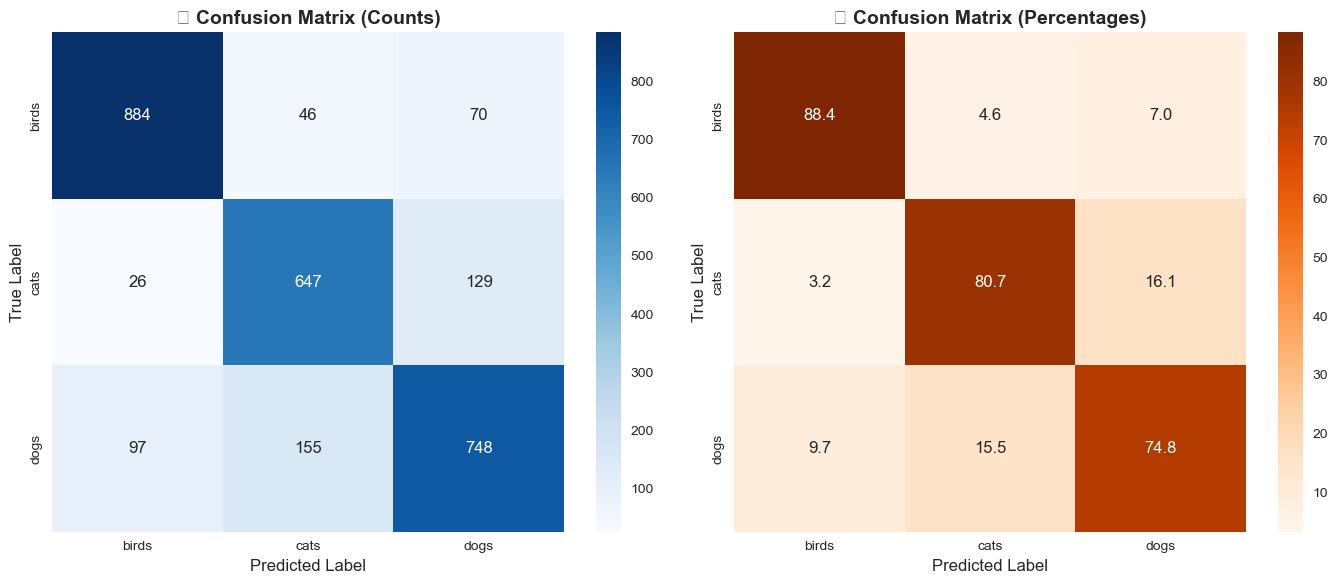


📈 Creating Advanced Metrics Dashboard...


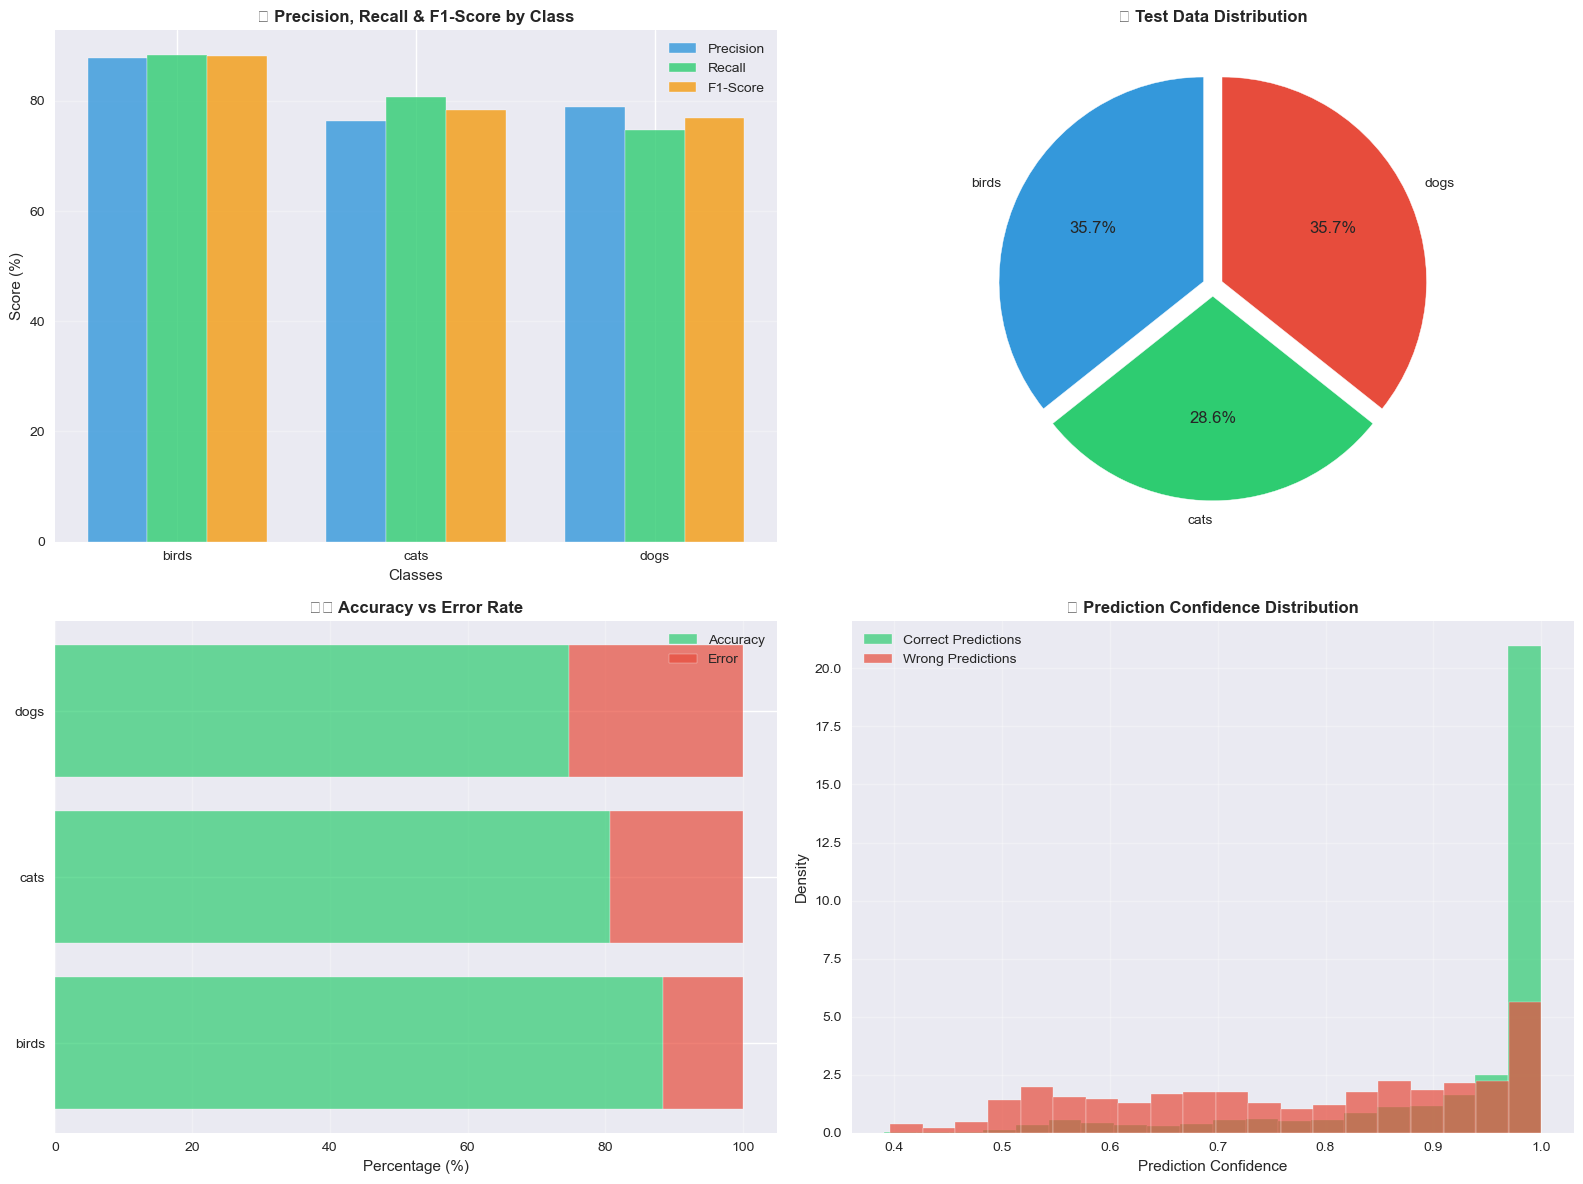


🎯 Plotting Confidence Analysis...


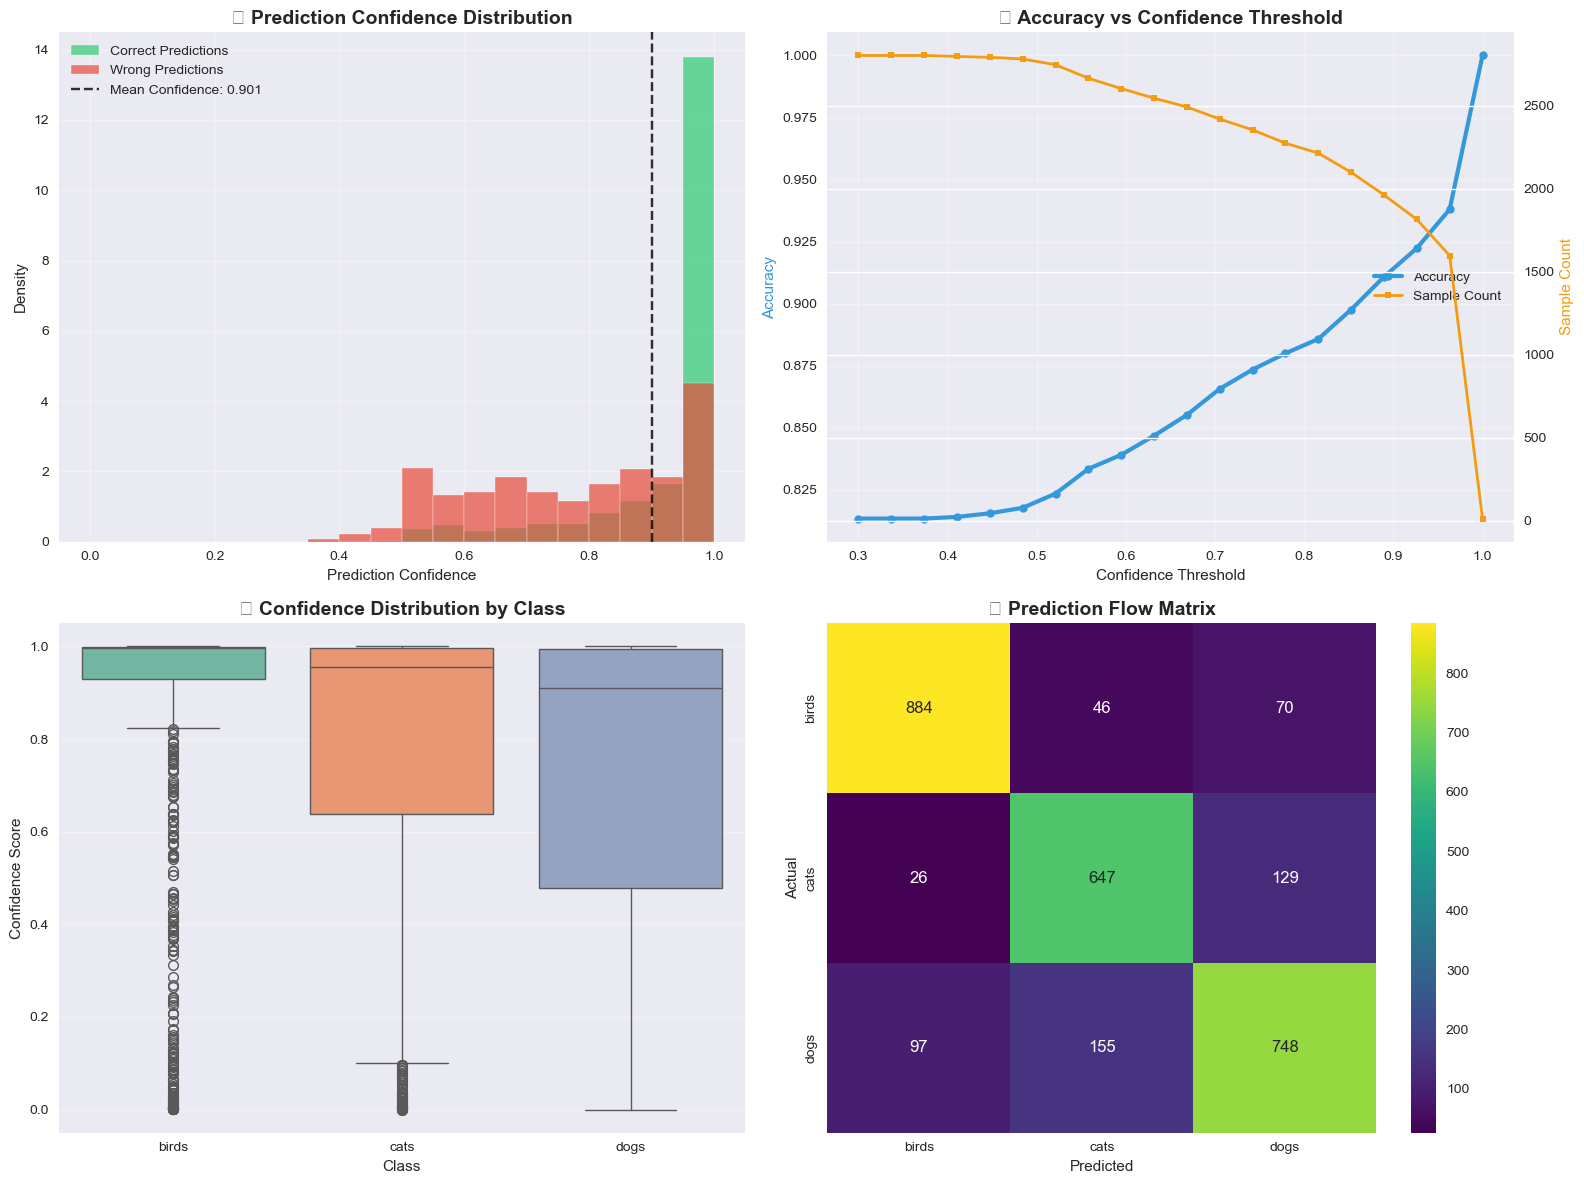


✨ Creating Performance Summary...


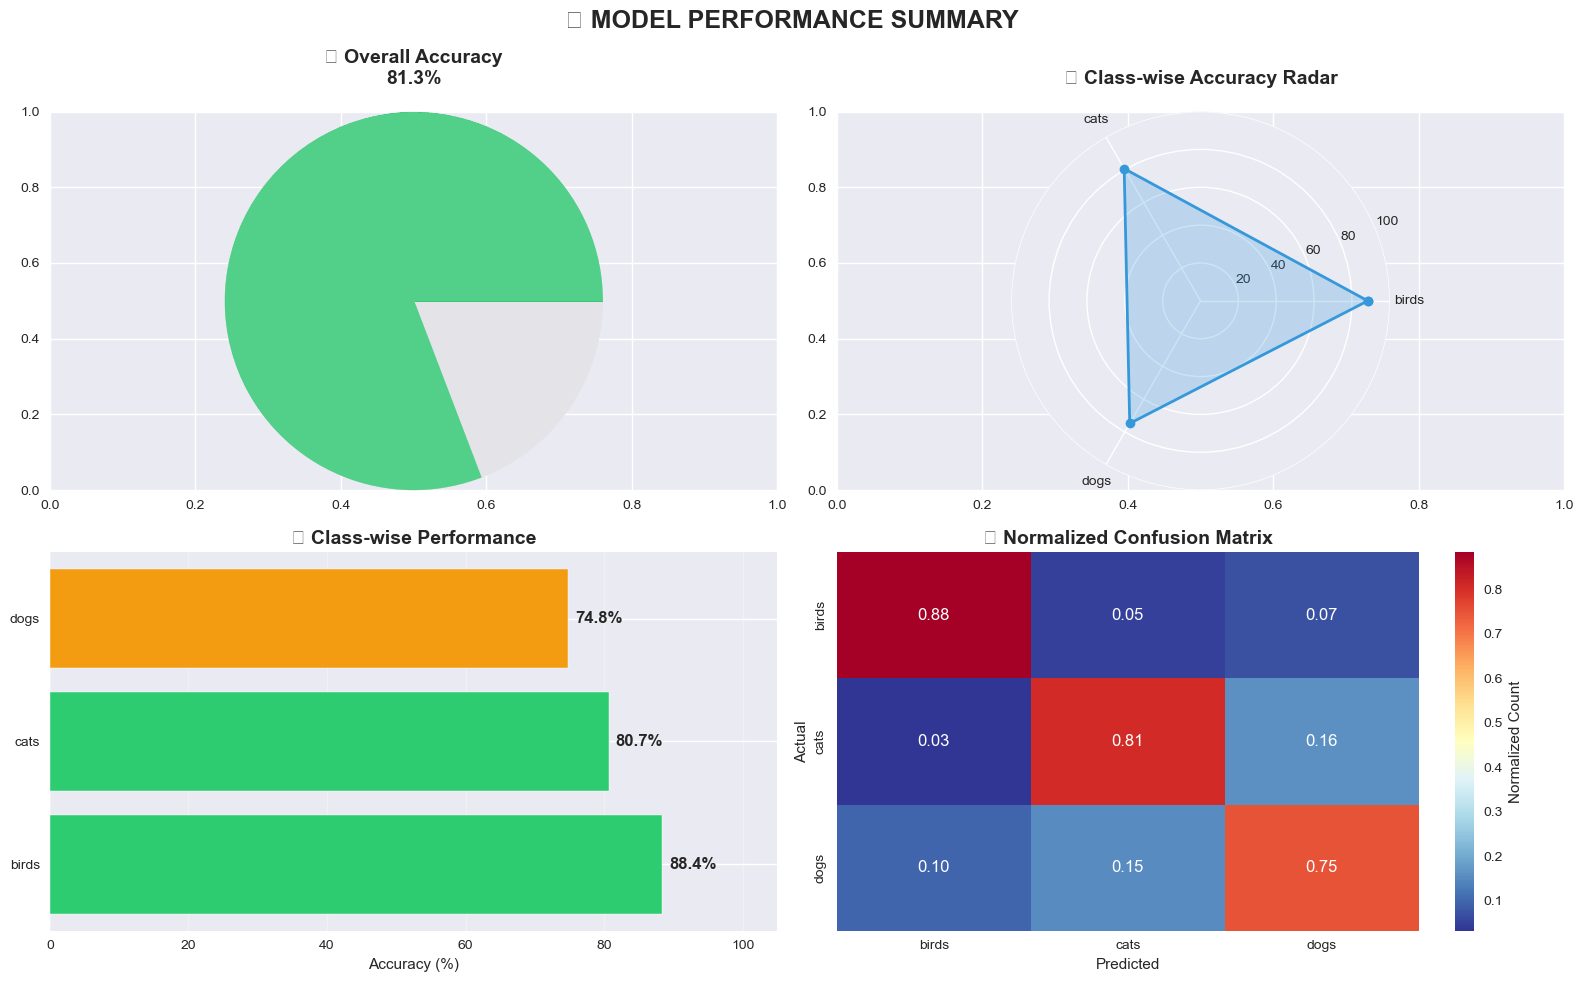


💾 Generating Detailed Report...
🎯 COMPREHENSIVE MODEL EVALUATION REPORT

📊 OVERALL PERFORMANCE:
├── Test Accuracy: 0.8133 (81.33%)
├── Total Test Samples: 2802
├── Correct Predictions: 2279
└── Wrong Predictions: 523

📋 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       birds       0.88      0.88      0.88      1000
        cats       0.76      0.81      0.78       802
        dogs       0.79      0.75      0.77      1000

    accuracy                           0.81      2802
   macro avg       0.81      0.81      0.81      2802
weighted avg       0.81      0.81      0.81      2802


🔍 CLASS-WISE DETAILED ANALYSIS:
├── birds:
│   ├── Accuracy: 0.8840 (88.40%)
│   ├── Avg Confidence: 0.8667
│   └── Sample Count: 1000
├── cats:
│   ├── Accuracy: 0.8067 (80.67%)
│   ├── Avg Confidence: 0.7752
│   └── Sample Count: 802
├── dogs:
│   ├── Accuracy: 0.7480 (74.80%)
│   ├── Avg Confidence: 0.7238
│   └── Sample Count: 1000

📁 Saving Results...
✅ Deta

In [152]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
import os

cnn_model_performance = 'cnn_model_performance'
if not os.path.exists(cnn_model_performance):
    os.makedirs(cnn_model_performance)
    print(f"'{cnn_model_performance}' klasörü oluşturuldu.")


warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
COLORS = {
    'primary': '#3498db',
    'success': '#2ecc71', 
    'danger': '#e74c3c',
    'warning': '#f39c12',
    'info': '#9b59b6',
    'dark': '#2c3e50'
}

class AdvancedModelEvaluator:
    def __init__(self, model, test_loader, class_names, device):
        self.model = model
        self.test_loader = test_loader
        self.class_names = class_names
        self.device = device
        self.all_labels = []
        self.all_preds = []
        self.all_probs = []
        
    def collect_predictions(self):
        print("🔄 Collecting predictions...")
        self.model.eval()
        
        with torch.no_grad():
            for images, labels in self.test_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = model(images)
                probs = torch.softmax(outputs, dim=1)
                preds = outputs.argmax(1)
                
                self.all_labels.append(labels.cpu())
                self.all_preds.append(preds.cpu())
                self.all_probs.append(probs.cpu())
                
        self.all_labels = torch.cat(self.all_labels).numpy()
        self.all_preds = torch.cat(self.all_preds).numpy()
        self.all_probs = torch.cat(self.all_probs).numpy()
        print("✅ Predictions collected!")
    
    def plot_enhanced_confusion_matrix(self):
        cm = confusion_matrix(self.all_labels, self.all_preds)
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=self.class_names, yticklabels=self.class_names, ax=ax1)
        ax1.set_title('🔢 Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
        ax1.set_ylabel('True Label', fontsize=12)
        ax1.set_xlabel('Predicted Label', fontsize=12)

        sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Oranges',
                   xticklabels=self.class_names, yticklabels=self.class_names, ax=ax2)
        ax2.set_title('📊 Confusion Matrix (Percentages)', fontsize=14, fontweight='bold')
        ax2.set_ylabel('True Label', fontsize=12)
        ax2.set_xlabel('Predicted Label', fontsize=12)
        
        plt.tight_layout()
        plt.savefig(os.path.join(cnn_model_performance, 'enhanced_confusion_matrix.png'))
        plt.show()
        
    def plot_advanced_metrics_dashboard(self):
        # Calculate metrics
        precision, recall, f1, support = precision_recall_fscore_support(
            self.all_labels, self.all_preds, average=None
        )

        metrics_df = pd.DataFrame({
            'Class': self.class_names,
            'Precision': precision * 100,
            'Recall': recall * 100,
            'F1-Score': f1 * 100,
            'Support': support
        })
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Precision-Recall-F1 comparison
        x = np.arange(len(self.class_names))
        width = 0.25
        
        ax1.bar(x - width, metrics_df['Precision'], width, label='Precision', 
               color=COLORS['primary'], alpha=0.8)
        ax1.bar(x, metrics_df['Recall'], width, label='Recall', 
               color=COLORS['success'], alpha=0.8)
        ax1.bar(x + width, metrics_df['F1-Score'], width, label='F1-Score', 
               color=COLORS['warning'], alpha=0.8)
        
        ax1.set_xlabel('Classes')
        ax1.set_ylabel('Score (%)')
        ax1.set_title('📊 Precision, Recall & F1-Score by Class', fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels(self.class_names)
        ax1.legend()
        ax1.grid(axis='y', alpha=0.3)
        
        colors_pie = [COLORS['primary'], COLORS['success'], COLORS['danger']][:len(self.class_names)]
        wedges, texts, autotexts = ax2.pie(metrics_df['Support'], labels=self.class_names, 
                                          colors=colors_pie, autopct='%1.1f%%', 
                                          startangle=90, explode=[0.05]*len(self.class_names))
        ax2.set_title('🥧 Test Data Distribution', fontweight='bold')
    
        accuracy_per_class = []
        error_per_class = []
        for i, class_name in enumerate(self.class_names):
            mask = self.all_labels == i
            if mask.sum() > 0:
                acc = (self.all_preds[mask] == self.all_labels[mask]).mean() * 100
                accuracy_per_class.append(acc)
                error_per_class.append(100 - acc)
            else:
                accuracy_per_class.append(0)
                error_per_class.append(100)
        
        x_pos = np.arange(len(self.class_names))
        ax3.barh(x_pos, accuracy_per_class, color=COLORS['success'], alpha=0.7, label='Accuracy')
        ax3.barh(x_pos, error_per_class, left=accuracy_per_class, 
                color=COLORS['danger'], alpha=0.7, label='Error')
        ax3.set_yticks(x_pos)
        ax3.set_yticklabels(self.class_names)
        ax3.set_xlabel('Percentage (%)')
        ax3.set_title('⚖️ Accuracy vs Error Rate', fontweight='bold')
        ax3.legend()
        ax3.grid(axis='x', alpha=0.3)
        
        max_probs = np.max(self.all_probs, axis=1)
        correct_mask = self.all_labels == self.all_preds
        
        ax4.hist(max_probs[correct_mask], bins=20, alpha=0.7, 
                label='Correct Predictions', color=COLORS['success'], density=True)
        ax4.hist(max_probs[~correct_mask], bins=20, alpha=0.7, 
                label='Wrong Predictions', color=COLORS['danger'], density=True)
        ax4.set_xlabel('Prediction Confidence')
        ax4.set_ylabel('Density')
        ax4.set_title('🎯 Prediction Confidence Distribution', fontweight='bold')
        ax4.legend()
        ax4.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return metrics_df
    
    def plot_interactive_results(self):
        """Interactive Plotly visualizations"""
        precision, recall, f1, support = precision_recall_fscore_support(
            self.all_labels, self.all_preds, average=None
        )
        
        # Create interactive subplot
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('📊 Metrics Comparison', '🎯 Confidence vs Accuracy', 
                          '🔄 Prediction Flow', '📈 Performance Radar'),
            specs=[[{"type": "bar"}, {"type": "scatter"}],
                   [{"type": "sankey"}, {"type": "scatterpolar"}]]
        )
        
        metrics = ['Precision', 'Recall', 'F1-Score']
        for i, metric in enumerate([precision, recall, f1]):
            fig.add_trace(
                go.Bar(x=self.class_names, y=metric*100, name=metrics[i],
                      marker_color=px.colors.qualitative.Set3[i]),
                row=1, col=1
            )

        max_probs = np.max(self.all_probs, axis=1)
        correct_mask = self.all_labels == self.all_preds
        
        fig.add_trace(
            go.Scatter(x=max_probs[correct_mask], y=[1]*correct_mask.sum(),
                      mode='markers', name='Correct', 
                      marker=dict(color='green', size=8, opacity=0.6)),
            row=1, col=2
        )
        fig.add_trace(
            go.Scatter(x=max_probs[~correct_mask], y=[0]*(~correct_mask).sum(),
                      mode='markers', name='Wrong',
                      marker=dict(color='red', size=8, opacity=0.6)),
            row=1, col=2
        )
        
        categories = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
        overall_acc = (self.all_labels == self.all_preds).mean()
        values = [precision.mean(), recall.mean(), f1.mean(), overall_acc]
        
        fig.add_trace(
            go.Scatterpolar(r=values, theta=categories, fill='toself',
                           name='Model Performance', line_color='blue'),
            row=2, col=2
        )
        
        fig.update_layout(height=800, title_text="🚀 Advanced Model Evaluation Dashboard")
        fig.show()
    
    def generate_detailed_report(self):
        overall_acc = (self.all_labels == self.all_preds).mean()
        
        print("=" * 60)
        print("🎯 COMPREHENSIVE MODEL EVALUATION REPORT")
        print("=" * 60)
        
        print(f"\n📊 OVERALL PERFORMANCE:")
        print(f"├── Test Accuracy: {overall_acc:.4f} ({overall_acc*100:.2f}%)")
        print(f"├── Total Test Samples: {len(self.all_labels)}")
        print(f"├── Correct Predictions: {(self.all_labels == self.all_preds).sum()}")
        print(f"└── Wrong Predictions: {(self.all_labels != self.all_preds).sum()}")
        
        print(f"\n📋 DETAILED CLASSIFICATION REPORT:")
        print(classification_report(self.all_labels, self.all_preds, 
                                   target_names=self.class_names))
        
        print(f"\n🔍 CLASS-WISE DETAILED ANALYSIS:")
        for i, class_name in enumerate(self.class_names):
            mask = self.all_labels == i
            if mask.sum() > 0:
                class_acc = (self.all_preds[mask] == self.all_labels[mask]).mean()
                avg_confidence = self.all_probs[mask, i].mean()
                print(f"├── {class_name}:")
                print(f"│   ├── Accuracy: {class_acc:.4f} ({class_acc*100:.2f}%)")
                print(f"│   ├── Avg Confidence: {avg_confidence:.4f}")
                print(f"│   └── Sample Count: {mask.sum()}")
        
        print("=" * 60)
    
    def plot_prediction_confidence_analysis(self):

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        max_probs = np.max(self.all_probs, axis=1)
        correct_mask = self.all_labels == self.all_preds
        
        bins = np.linspace(0, 1, 21)
        ax1.hist(max_probs[correct_mask], bins=bins, alpha=0.7, 
                label='Correct Predictions', color=COLORS['success'], density=True)
        ax1.hist(max_probs[~correct_mask], bins=bins, alpha=0.7, 
                label='Wrong Predictions', color=COLORS['danger'], density=True)
        ax1.axvline(max_probs.mean(), color='black', linestyle='--', alpha=0.8, 
                   label=f'Mean Confidence: {max_probs.mean():.3f}')
        ax1.set_xlabel('Prediction Confidence')
        ax1.set_ylabel('Density')
        ax1.set_title('🎯 Prediction Confidence Distribution', fontweight='bold', fontsize=14)
        ax1.legend()
        ax1.grid(alpha=0.3)
        
        confidence_thresholds = np.linspace(0.3, 1.0, 20)
        accuracies = []
        sample_counts = []
        
        for threshold in confidence_thresholds:
            high_conf_mask = max_probs >= threshold
            if high_conf_mask.sum() > 0:
                acc = (self.all_labels[high_conf_mask] == self.all_preds[high_conf_mask]).mean()
                accuracies.append(acc)
                sample_counts.append(high_conf_mask.sum())
            else:
                accuracies.append(0)
                sample_counts.append(0)
        
        ax2_twin = ax2.twinx()
        line1 = ax2.plot(confidence_thresholds, accuracies, 'o-', 
                        color=COLORS['primary'], linewidth=3, markersize=6, label='Accuracy')
        line2 = ax2_twin.plot(confidence_thresholds, sample_counts, 's-', 
                             color=COLORS['warning'], linewidth=2, markersize=4, label='Sample Count')
        
        ax2.set_xlabel('Confidence Threshold')
        ax2.set_ylabel('Accuracy', color=COLORS['primary'])
        ax2_twin.set_ylabel('Sample Count', color=COLORS['warning'])
        ax2.set_title('📈 Accuracy vs Confidence Threshold', fontweight='bold', fontsize=14)
        ax2.grid(alpha=0.3)
        
        # Combine legends
        lines1, labels1 = ax2.get_legend_handles_labels()
        lines2, labels2 = ax2_twin.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='center right')
        
        confidence_by_class = []
        class_labels = []
        
        for i, class_name in enumerate(self.class_names):
            mask = self.all_labels == i
            if mask.sum() > 0:
                confidence_by_class.extend(self.all_probs[mask, i])
                class_labels.extend([class_name] * mask.sum())
        
        conf_df = pd.DataFrame({'Class': class_labels, 'Confidence': confidence_by_class})
        sns.boxplot(data=conf_df, x='Class', y='Confidence', ax=ax3, palette='Set2')
        ax3.set_title('📦 Confidence Distribution by Class', fontweight='bold', fontsize=14)
        ax3.set_ylabel('Confidence Score')
        ax3.grid(axis='y', alpha=0.3)
        
        pred_matrix = np.zeros((len(self.class_names), len(self.class_names)))
        for true_idx in range(len(self.class_names)):
            for pred_idx in range(len(self.class_names)):
                mask = (self.all_labels == true_idx) & (self.all_preds == pred_idx)
                pred_matrix[true_idx, pred_idx] = mask.sum()
        
        sns.heatmap(pred_matrix, annot=True, fmt='.0f', cmap='viridis',
                   xticklabels=self.class_names, yticklabels=self.class_names, ax=ax4)
        ax4.set_title('🎨 Prediction Flow Matrix', fontweight='bold', fontsize=14)
        ax4.set_xlabel('Predicted')
        ax4.set_ylabel('Actual')
        
        plt.tight_layout()
        plt.savefig(os.path.join(cnn_model_performance, 'prediction_confidence_analysis.png'))
        plt.show()
    
    def plot_model_performance_summary(self):
        
        overall_acc = (self.all_labels == self.all_preds).mean()
        
        class_accuracies = []
        for i in range(len(self.class_names)):
            mask = self.all_labels == i
            if mask.sum() > 0:
                acc = (self.all_preds[mask] == self.all_labels[mask]).mean()
                class_accuracies.append(acc * 100)
            else:
                class_accuracies.append(0)
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))
        fig.suptitle('🎯 MODEL PERFORMANCE SUMMARY', fontsize=18, fontweight='bold', y=0.98)
        
        theta = np.linspace(0, 2*np.pi, 100)
        r = np.ones_like(theta)
        
        ax1 = plt.subplot(221, projection='polar')
        ax1.fill_between(theta, 0, r, alpha=0.3, color='lightgray')
        
        acc_theta = theta[:int(overall_acc * 100)]
        if len(acc_theta) > 0:
            ax1.fill_between(acc_theta, 0, r[:len(acc_theta)], 
                           color=COLORS['success'], alpha=0.8)
        
        ax1.set_ylim(0, 1)
        ax1.set_title(f'🎯 Overall Accuracy\n{overall_acc*100:.1f}%', 
                     fontweight='bold', fontsize=14, pad=20)
        ax1.set_rticks([])
        ax1.set_thetagrids([])
        
        ax2 = plt.subplot(222, projection='polar')
        angles = np.linspace(0, 2*np.pi, len(self.class_names), endpoint=False)
        angles = np.concatenate((angles, [angles[0]]))  # Complete the circle
        
        values = class_accuracies + [class_accuracies[0]]
        ax2.plot(angles, values, 'o-', linewidth=2, color=COLORS['primary'])
        ax2.fill(angles, values, alpha=0.25, color=COLORS['primary'])
        ax2.set_xticks(angles[:-1])
        ax2.set_xticklabels(self.class_names)
        ax2.set_ylim(0, 100)
        ax2.set_title('🔄 Class-wise Accuracy Radar', fontweight='bold', fontsize=14, pad=20)
        ax2.grid(True)
        
        ax3 = plt.subplot(223)
        bars = ax3.barh(self.class_names, class_accuracies, 
                       color=[COLORS['success'] if acc > 80 else COLORS['warning'] if acc > 60 
                             else COLORS['danger'] for acc in class_accuracies])
        
        for i, (bar, acc) in enumerate(zip(bars, class_accuracies)):
            ax3.text(acc + 1, i, f'{acc:.1f}%', va='center', fontweight='bold')
        
        ax3.set_xlabel('Accuracy (%)')
        ax3.set_title('📊 Class-wise Performance', fontweight='bold', fontsize=14)
        ax3.set_xlim(0, 105)
        ax3.grid(axis='x', alpha=0.3)
        

        ax4 = plt.subplot(224)
        cm = confusion_matrix(self.all_labels, self.all_preds)
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='RdYlBu_r',
                   xticklabels=self.class_names, yticklabels=self.class_names, 
                   ax=ax4, cbar_kws={'label': 'Normalized Count'})
        ax4.set_title('🎨 Normalized Confusion Matrix', fontweight='bold', fontsize=14)
        ax4.set_xlabel('Predicted')
        ax4.set_ylabel('Actual')
        
        plt.tight_layout()
        plt.savefig(os.path.join(cnn_model_performance, 'model_performance_summary.png'))
        plt.show()
    
    def save_detailed_results(self):

        results_df = pd.DataFrame({
            'True_Label': [self.class_names[label] for label in self.all_labels],
            'Predicted_Label': [self.class_names[pred] for pred in self.all_preds],
            'Correct': self.all_labels == self.all_preds,
            'Confidence': np.max(self.all_probs, axis=1)
        })
        
        for i, class_name in enumerate(self.class_names):
            results_df[f'Prob_{class_name}'] = self.all_probs[:, i]
        
        results_df.to_csv('Detailed_Test_Results_cnn.csv', index=False)
        print("✅ Detailed results saved to 'Detailed_Test_Results_cnn.csv'")
        
        return results_df

# Initialize evaluator
evaluator = AdvancedModelEvaluator(model, test_loader, class_names, device)

# Run comprehensive evaluation
print("🚀 Starting Advanced Model Evaluation...")
evaluator.collect_predictions()

print("\n📊 Generating Enhanced Confusion Matrix...")
evaluator.plot_enhanced_confusion_matrix()

print("\n📈 Creating Advanced Metrics Dashboard...")
metrics_df = evaluator.plot_advanced_metrics_dashboard()

print("\n🎯 Plotting Confidence Analysis...")
evaluator.plot_prediction_confidence_analysis()

print("\n✨ Creating Performance Summary...")
evaluator.plot_model_performance_summary()

print("\n💾 Generating Detailed Report...")
evaluator.generate_detailed_report()

print("\n📁 Saving Results...")
results_df = evaluator.save_detailed_results()

print("\n🎉 Evaluation Complete!")
print("📊 Check the generated visualizations and CSV file for detailed insights.")

##### efficient için

In [ ]:
from torchvision import models
transform_val_test = transforms.Compose([
    transforms.Resize((244, 244)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])           # 1 kanal için normalize
])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_dir  = r"enter your path"
test_dataset  = datasets.ImageFolder(test_dir, transform=transform_val_test)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)

model_rgb = models.efficientnet_b0(weights=None)
num_classes = len(class_names)

model_rgb.classifier[1] = torch.nn.Linear(model_rgb.classifier[1].in_features, num_classes)
model_rgb = model_rgb.to(device)
save_path = "efficientnet_rgb_model_colab.pth"
model_rgb.load_state_dict(torch.load(save_path, map_location=device))
model_rgb.eval()
print("✅ EfficientNet RGB model loaded successfully")

✅ EfficientNet RGB model loaded successfully


'efficient_model_performance' klasörü oluşturuldu.
🚀 Starting Advanced Model Evaluation...
🔄 Collecting predictions...
✅ Predictions collected!

📊 Generating Enhanced Confusion Matrix...


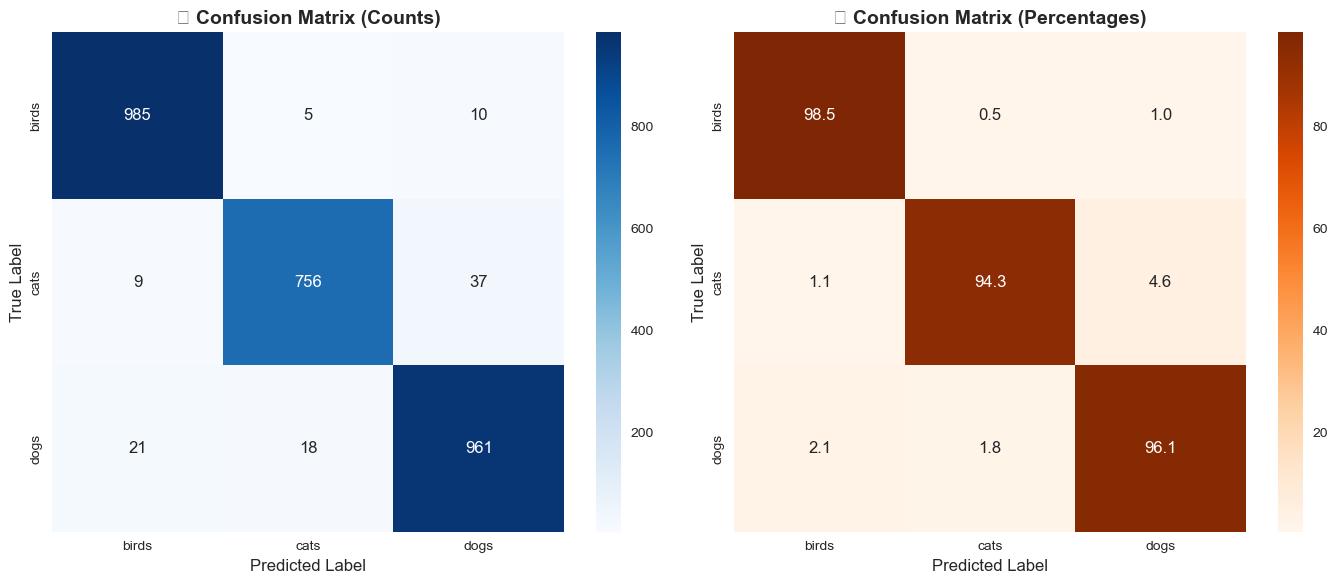


📈 Creating Advanced Metrics Dashboard...


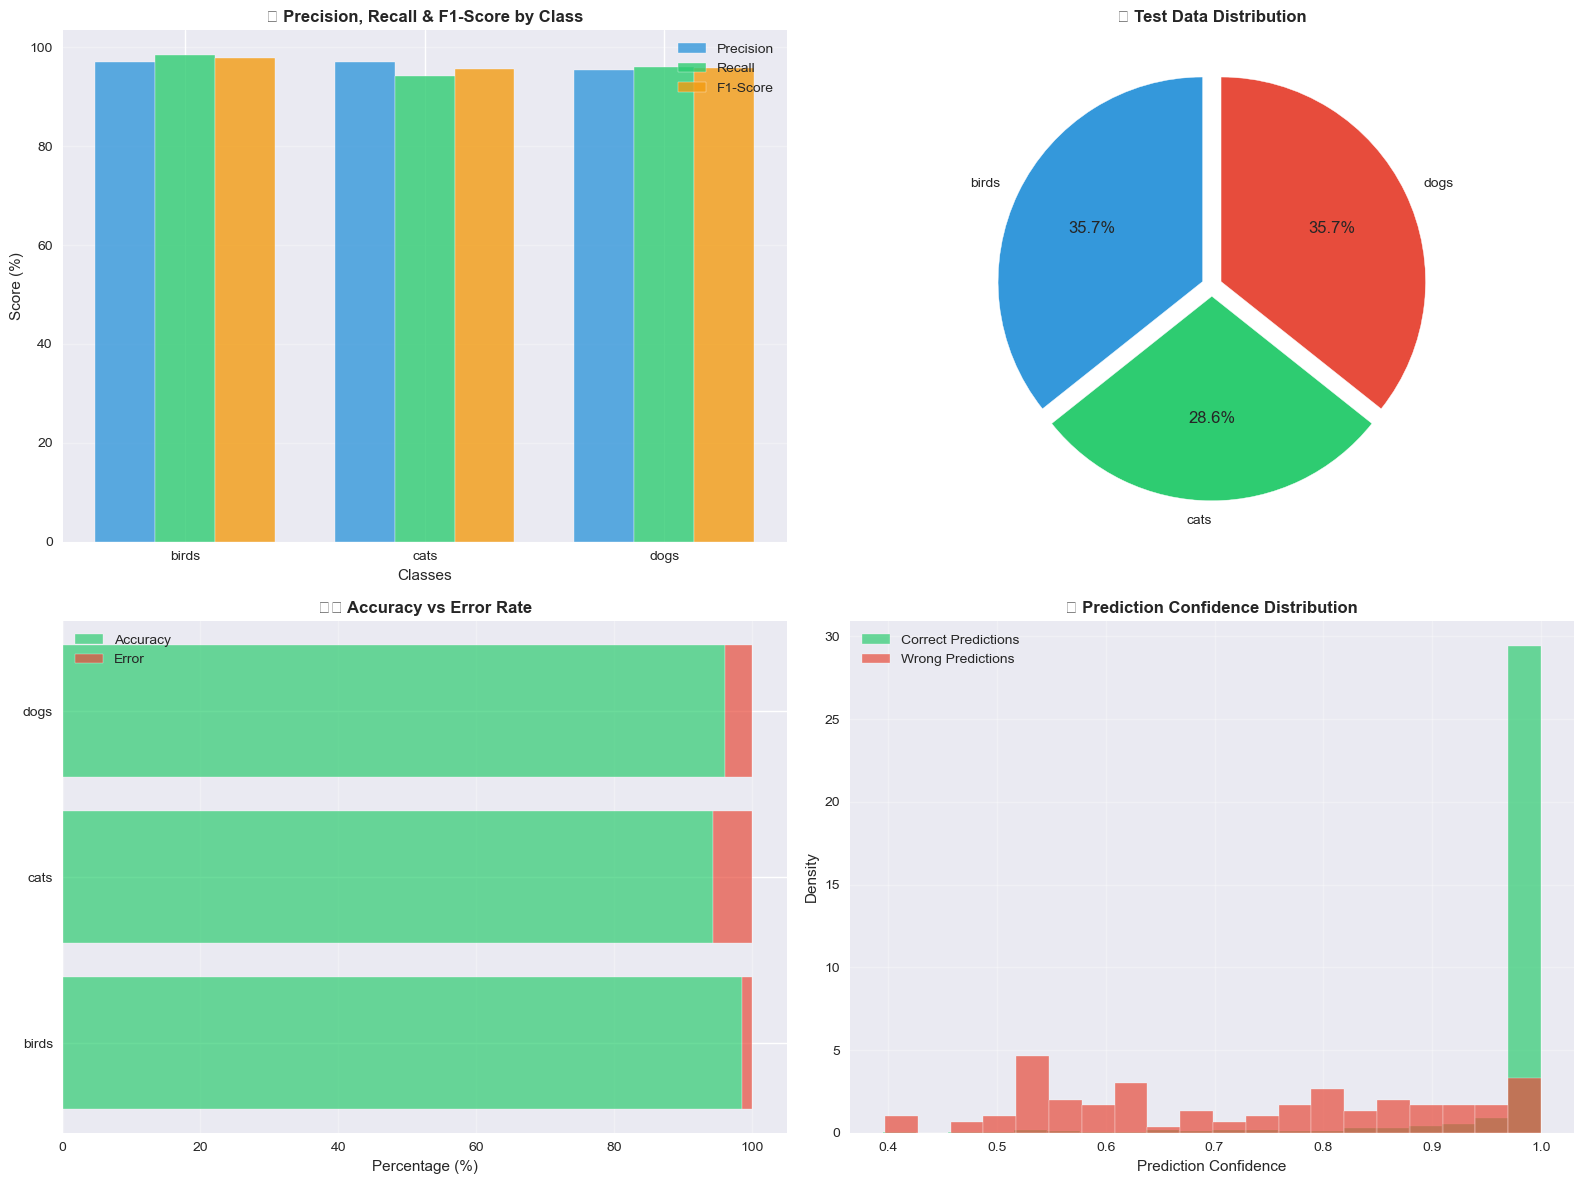


🎯 Plotting Confidence Analysis...


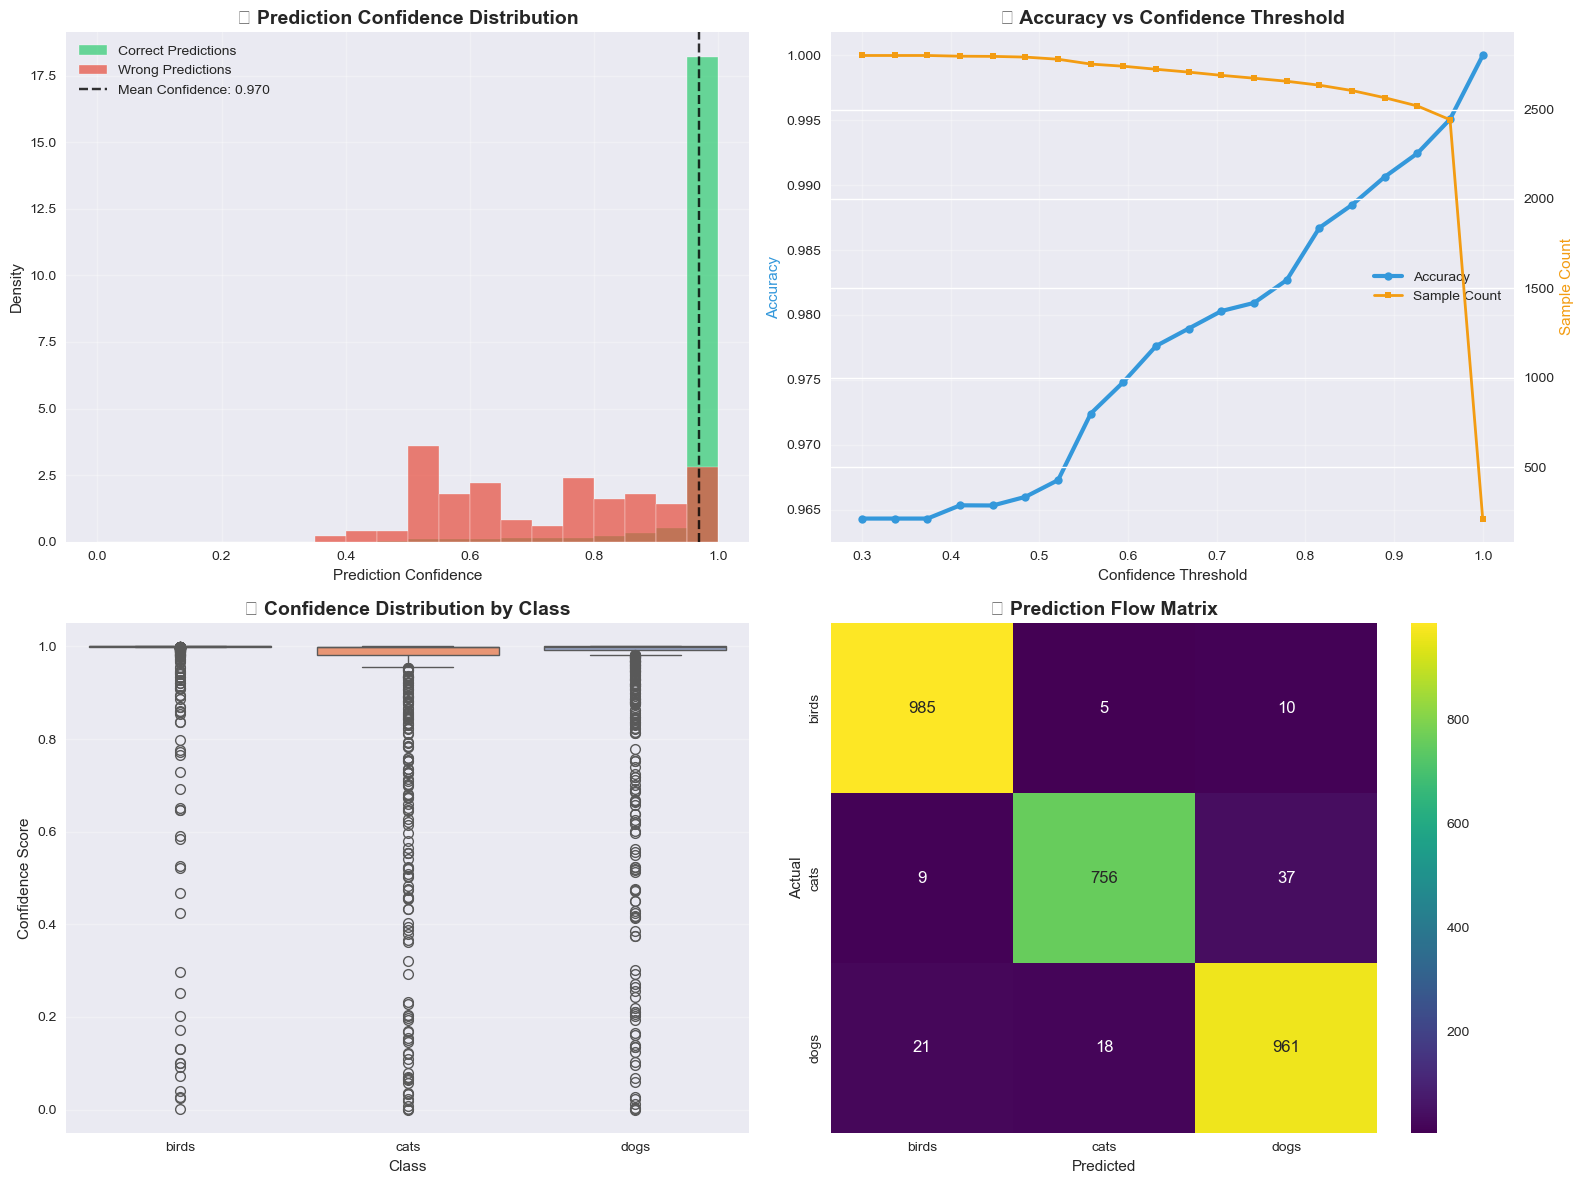


✨ Creating Performance Summary...


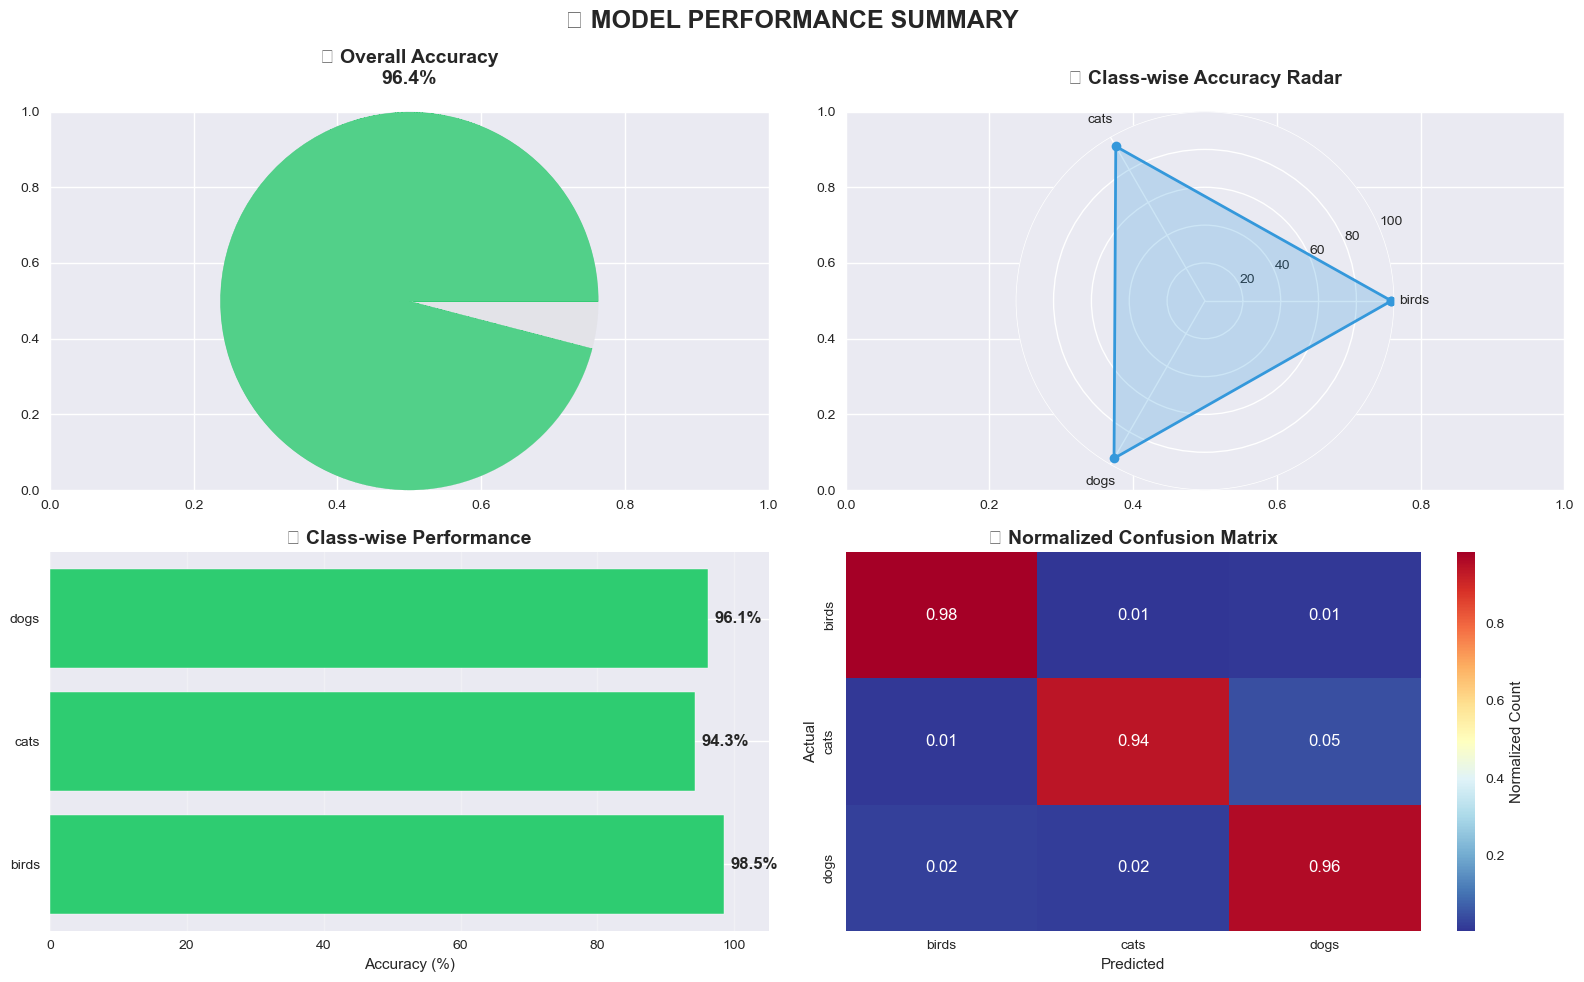


💾 Generating Detailed Report...
🎯 COMPREHENSIVE MODEL EVALUATION REPORT

📊 OVERALL PERFORMANCE:
├── Test Accuracy: 0.9643 (96.43%)
├── Total Test Samples: 2802
├── Correct Predictions: 2702
└── Wrong Predictions: 100

📋 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       birds       0.97      0.98      0.98      1000
        cats       0.97      0.94      0.96       802
        dogs       0.95      0.96      0.96      1000

    accuracy                           0.96      2802
   macro avg       0.96      0.96      0.96      2802
weighted avg       0.96      0.96      0.96      2802


🔍 CLASS-WISE DETAILED ANALYSIS:
├── birds:
│   ├── Accuracy: 0.9850 (98.50%)
│   ├── Avg Confidence: 0.9789
│   └── Sample Count: 1000
├── cats:
│   ├── Accuracy: 0.9426 (94.26%)
│   ├── Avg Confidence: 0.9230
│   └── Sample Count: 802
├── dogs:
│   ├── Accuracy: 0.9610 (96.10%)
│   ├── Avg Confidence: 0.9472
│   └── Sample Count: 1000

📁 Saving Results...
✅ Deta

In [158]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

eff_model_performance = 'efficient_model_performance'
if not os.path.exists(eff_model_performance):
    os.makedirs(eff_model_performance)
    print(f"'{eff_model_performance}' klasörü oluşturuldu.")

# Set modern style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# --- 🎨 Enhanced Color Schemes ---
COLORS = {
    'primary': '#3498db',
    'success': '#2ecc71', 
    'danger': '#e74c3c',
    'warning': '#f39c12',
    'info': '#9b59b6',
    'dark': '#2c3e50'
}

class AdvancedModelEvaluator:
    def __init__(self, model_rgb, test_loader, class_names, device):
        self.model = model_rgb
        self.test_loader = test_loader
        self.class_names = class_names
        self.device = device
        self.all_labels = []
        self.all_preds = []
        self.all_probs = []
        
    def collect_predictions(self):
        """Collect all predictions and probabilities"""
        print("🔄 Collecting predictions...")
        self.model.eval()
        
        with torch.no_grad():
            for images, labels in self.test_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)  # ✅ self.model kullandık
                probs = torch.softmax(outputs, dim=1)
                preds = outputs.argmax(1)
                
                self.all_labels.append(labels.cpu())
                self.all_preds.append(preds.cpu())
                self.all_probs.append(probs.cpu())
                
        self.all_labels = torch.cat(self.all_labels).numpy()
        self.all_preds = torch.cat(self.all_preds).numpy()
        self.all_probs = torch.cat(self.all_probs).numpy()
        print("✅ Predictions collected!")

    
    def plot_enhanced_confusion_matrix(self):
        """Enhanced confusion matrix with percentages"""
        cm = confusion_matrix(self.all_labels, self.all_preds)
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Raw counts
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=self.class_names, yticklabels=self.class_names, ax=ax1)
        ax1.set_title('🔢 Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
        ax1.set_ylabel('True Label', fontsize=12)
        ax1.set_xlabel('Predicted Label', fontsize=12)
        
        # Percentages
        sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Oranges',
                   xticklabels=self.class_names, yticklabels=self.class_names, ax=ax2)
        ax2.set_title('📊 Confusion Matrix (Percentages)', fontsize=14, fontweight='bold')
        ax2.set_ylabel('True Label', fontsize=12)
        ax2.set_xlabel('Predicted Label', fontsize=12)
        
        plt.tight_layout()
        plt.savefig(os.path.join(eff_model_performance, 'confusion_matrix.png'))
        plt.show()
    
    def plot_advanced_metrics_dashboard(self):
        """Advanced metrics dashboard"""
        # Calculate metrics
        precision, recall, f1, support = precision_recall_fscore_support(
            self.all_labels, self.all_preds, average=None
        )
        
        # Create metrics DataFrame
        metrics_df = pd.DataFrame({
            'Class': self.class_names,
            'Precision': precision * 100,
            'Recall': recall * 100,
            'F1-Score': f1 * 100,
            'Support': support
        })
        
        # Create subplots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Precision-Recall-F1 comparison
        x = np.arange(len(self.class_names))
        width = 0.25
        
        ax1.bar(x - width, metrics_df['Precision'], width, label='Precision', 
               color=COLORS['primary'], alpha=0.8)
        ax1.bar(x, metrics_df['Recall'], width, label='Recall', 
               color=COLORS['success'], alpha=0.8)
        ax1.bar(x + width, metrics_df['F1-Score'], width, label='F1-Score', 
               color=COLORS['warning'], alpha=0.8)
        
        ax1.set_xlabel('Classes')
        ax1.set_ylabel('Score (%)')
        ax1.set_title('📊 Precision, Recall & F1-Score by Class', fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels(self.class_names)
        ax1.legend()
        ax1.grid(axis='y', alpha=0.3)
        
        # 2. Class distribution (support)
        colors_pie = [COLORS['primary'], COLORS['success'], COLORS['danger']][:len(self.class_names)]
        wedges, texts, autotexts = ax2.pie(metrics_df['Support'], labels=self.class_names, 
                                          colors=colors_pie, autopct='%1.1f%%', 
                                          startangle=90, explode=[0.05]*len(self.class_names))
        ax2.set_title('🥧 Test Data Distribution', fontweight='bold')
        
        # 3. Accuracy vs Error by class
        accuracy_per_class = []
        error_per_class = []
        for i, class_name in enumerate(self.class_names):
            mask = self.all_labels == i
            if mask.sum() > 0:
                acc = (self.all_preds[mask] == self.all_labels[mask]).mean() * 100
                accuracy_per_class.append(acc)
                error_per_class.append(100 - acc)
            else:
                accuracy_per_class.append(0)
                error_per_class.append(100)
        
        x_pos = np.arange(len(self.class_names))
        ax3.barh(x_pos, accuracy_per_class, color=COLORS['success'], alpha=0.7, label='Accuracy')
        ax3.barh(x_pos, error_per_class, left=accuracy_per_class, 
                color=COLORS['danger'], alpha=0.7, label='Error')
        ax3.set_yticks(x_pos)
        ax3.set_yticklabels(self.class_names)
        ax3.set_xlabel('Percentage (%)')
        ax3.set_title('⚖️ Accuracy vs Error Rate', fontweight='bold')
        ax3.legend()
        ax3.grid(axis='x', alpha=0.3)
        
        # 4. Prediction confidence distribution
        max_probs = np.max(self.all_probs, axis=1)
        correct_mask = self.all_labels == self.all_preds
        
        ax4.hist(max_probs[correct_mask], bins=20, alpha=0.7, 
                label='Correct Predictions', color=COLORS['success'], density=True)
        ax4.hist(max_probs[~correct_mask], bins=20, alpha=0.7, 
                label='Wrong Predictions', color=COLORS['danger'], density=True)
        ax4.set_xlabel('Prediction Confidence')
        ax4.set_ylabel('Density')
        ax4.set_title('🎯 Prediction Confidence Distribution', fontweight='bold')
        ax4.legend()
        ax4.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(os.path.join(eff_model_performance, 'metrics_dashboard.png'))
        plt.show()
        
        return metrics_df
    
    def plot_interactive_results(self):
        """Interactive Plotly visualizations"""
        # Calculate metrics
        precision, recall, f1, support = precision_recall_fscore_support(
            self.all_labels, self.all_preds, average=None
        )
        
        # Create interactive subplot
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('📊 Metrics Comparison', '🎯 Confidence vs Accuracy', 
                          '🔄 Prediction Flow', '📈 Performance Radar'),
            specs=[[{"type": "bar"}, {"type": "scatter"}],
                   [{"type": "sankey"}, {"type": "scatterpolar"}]]
        )
        
        # 1. Metrics bar chart
        metrics = ['Precision', 'Recall', 'F1-Score']
        for i, metric in enumerate([precision, recall, f1]):
            fig.add_trace(
                go.Bar(x=self.class_names, y=metric*100, name=metrics[i],
                      marker_color=px.colors.qualitative.Set3[i]),
                row=1, col=1
            )
        
        # 2. Confidence vs Accuracy scatter
        max_probs = np.max(self.all_probs, axis=1)
        correct_mask = self.all_labels == self.all_preds
        
        fig.add_trace(
            go.Scatter(x=max_probs[correct_mask], y=[1]*correct_mask.sum(),
                      mode='markers', name='Correct', 
                      marker=dict(color='green', size=8, opacity=0.6)),
            row=1, col=2
        )
        fig.add_trace(
            go.Scatter(x=max_probs[~correct_mask], y=[0]*(~correct_mask).sum(),
                      mode='markers', name='Wrong',
                      marker=dict(color='red', size=8, opacity=0.6)),
            row=1, col=2
        )
        
        # 3. Radar chart for overall performance
        categories = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
        overall_acc = (self.all_labels == self.all_preds).mean()
        values = [precision.mean(), recall.mean(), f1.mean(), overall_acc]
        
        fig.add_trace(
            go.Scatterpolar(r=values, theta=categories, fill='toself',
                           name='Model Performance', line_color='blue'),
            row=2, col=2
        )
        
        fig.update_layout(height=800, title_text="🚀 Advanced Model Evaluation Dashboard")
        fig.show()
    
    def generate_detailed_report(self):
        """Generate comprehensive text report"""
        overall_acc = (self.all_labels == self.all_preds).mean()
        
        print("=" * 60)
        print("🎯 COMPREHENSIVE MODEL EVALUATION REPORT")
        print("=" * 60)
        
        print(f"\n📊 OVERALL PERFORMANCE:")
        print(f"├── Test Accuracy: {overall_acc:.4f} ({overall_acc*100:.2f}%)")
        print(f"├── Total Test Samples: {len(self.all_labels)}")
        print(f"├── Correct Predictions: {(self.all_labels == self.all_preds).sum()}")
        print(f"└── Wrong Predictions: {(self.all_labels != self.all_preds).sum()}")
        
        # Classification report
        print(f"\n📋 DETAILED CLASSIFICATION REPORT:")
        print(classification_report(self.all_labels, self.all_preds, 
                                   target_names=self.class_names))
        
        # Class-wise detailed analysis
        print(f"\n🔍 CLASS-WISE DETAILED ANALYSIS:")
        for i, class_name in enumerate(self.class_names):
            mask = self.all_labels == i
            if mask.sum() > 0:
                class_acc = (self.all_preds[mask] == self.all_labels[mask]).mean()
                avg_confidence = self.all_probs[mask, i].mean()
                print(f"├── {class_name}:")
                print(f"│   ├── Accuracy: {class_acc:.4f} ({class_acc*100:.2f}%)")
                print(f"│   ├── Avg Confidence: {avg_confidence:.4f}")
                print(f"│   └── Sample Count: {mask.sum()}")
        
        print("=" * 60)
    
    def plot_prediction_confidence_analysis(self):
        """Advanced confidence analysis"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Confidence distribution by correctness
        max_probs = np.max(self.all_probs, axis=1)
        correct_mask = self.all_labels == self.all_preds
        
        # Create bins for confidence ranges
        bins = np.linspace(0, 1, 21)
        ax1.hist(max_probs[correct_mask], bins=bins, alpha=0.7, 
                label='Correct Predictions', color=COLORS['success'], density=True)
        ax1.hist(max_probs[~correct_mask], bins=bins, alpha=0.7, 
                label='Wrong Predictions', color=COLORS['danger'], density=True)
        ax1.axvline(max_probs.mean(), color='black', linestyle='--', alpha=0.8, 
                   label=f'Mean Confidence: {max_probs.mean():.3f}')
        ax1.set_xlabel('Prediction Confidence')
        ax1.set_ylabel('Density')
        ax1.set_title('🎯 Prediction Confidence Distribution', fontweight='bold', fontsize=14)
        ax1.legend()
        ax1.grid(alpha=0.3)
        
        # 2. Confidence vs Accuracy curve
        confidence_thresholds = np.linspace(0.3, 1.0, 20)
        accuracies = []
        sample_counts = []
        
        for threshold in confidence_thresholds:
            high_conf_mask = max_probs >= threshold
            if high_conf_mask.sum() > 0:
                acc = (self.all_labels[high_conf_mask] == self.all_preds[high_conf_mask]).mean()
                accuracies.append(acc)
                sample_counts.append(high_conf_mask.sum())
            else:
                accuracies.append(0)
                sample_counts.append(0)
        
        ax2_twin = ax2.twinx()
        line1 = ax2.plot(confidence_thresholds, accuracies, 'o-', 
                        color=COLORS['primary'], linewidth=3, markersize=6, label='Accuracy')
        line2 = ax2_twin.plot(confidence_thresholds, sample_counts, 's-', 
                             color=COLORS['warning'], linewidth=2, markersize=4, label='Sample Count')
        
        ax2.set_xlabel('Confidence Threshold')
        ax2.set_ylabel('Accuracy', color=COLORS['primary'])
        ax2_twin.set_ylabel('Sample Count', color=COLORS['warning'])
        ax2.set_title('📈 Accuracy vs Confidence Threshold', fontweight='bold', fontsize=14)
        ax2.grid(alpha=0.3)
        
        # Combine legends
        lines1, labels1 = ax2.get_legend_handles_labels()
        lines2, labels2 = ax2_twin.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='center right')
        
        # 3. Class-wise confidence boxplot
        confidence_by_class = []
        class_labels = []
        
        for i, class_name in enumerate(self.class_names):
            mask = self.all_labels == i
            if mask.sum() > 0:
                confidence_by_class.extend(self.all_probs[mask, i])
                class_labels.extend([class_name] * mask.sum())
        
        conf_df = pd.DataFrame({'Class': class_labels, 'Confidence': confidence_by_class})
        sns.boxplot(data=conf_df, x='Class', y='Confidence', ax=ax3, palette='Set2')
        ax3.set_title('📦 Confidence Distribution by Class', fontweight='bold', fontsize=14)
        ax3.set_ylabel('Confidence Score')
        ax3.grid(axis='y', alpha=0.3)
        
        # 4. Prediction matrix heatmap
        pred_matrix = np.zeros((len(self.class_names), len(self.class_names)))
        for true_idx in range(len(self.class_names)):
            for pred_idx in range(len(self.class_names)):
                mask = (self.all_labels == true_idx) & (self.all_preds == pred_idx)
                pred_matrix[true_idx, pred_idx] = mask.sum()
        
        sns.heatmap(pred_matrix, annot=True, fmt='.0f', cmap='viridis',
                   xticklabels=self.class_names, yticklabels=self.class_names, ax=ax4)
        ax4.set_title('🎨 Prediction Flow Matrix', fontweight='bold', fontsize=14)
        ax4.set_xlabel('Predicted')
        ax4.set_ylabel('Actual')
        
        plt.tight_layout()
        plt.savefig(os.path.join(eff_model_performance, 'confidence_analysis.png'))
        plt.show()
    
    def plot_model_performance_summary(self):
        """Beautiful summary visualization"""
        overall_acc = (self.all_labels == self.all_preds).mean()
        
        # Calculate per-class accuracies
        class_accuracies = []
        for i in range(len(self.class_names)):
            mask = self.all_labels == i
            if mask.sum() > 0:
                acc = (self.all_preds[mask] == self.all_labels[mask]).mean()
                class_accuracies.append(acc * 100)
            else:
                class_accuracies.append(0)
        
        # Create elegant summary plot
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))
        fig.suptitle('🎯 MODEL PERFORMANCE SUMMARY', fontsize=18, fontweight='bold', y=0.98)
        
        # 1. Overall accuracy gauge
        theta = np.linspace(0, 2*np.pi, 100)
        r = np.ones_like(theta)
        
        ax1 = plt.subplot(221, projection='polar')
        ax1.fill_between(theta, 0, r, alpha=0.3, color='lightgray')
        
        # Fill accuracy portion
        acc_theta = theta[:int(overall_acc * 100)]
        if len(acc_theta) > 0:
            ax1.fill_between(acc_theta, 0, r[:len(acc_theta)], 
                           color=COLORS['success'], alpha=0.8)
        
        ax1.set_ylim(0, 1)
        ax1.set_title(f'🎯 Overall Accuracy\n{overall_acc*100:.1f}%', 
                     fontweight='bold', fontsize=14, pad=20)
        ax1.set_rticks([])
        ax1.set_thetagrids([])
        
        # 2. Class accuracy radar
        ax2 = plt.subplot(222, projection='polar')
        angles = np.linspace(0, 2*np.pi, len(self.class_names), endpoint=False)
        angles = np.concatenate((angles, [angles[0]]))  # Complete the circle
        
        values = class_accuracies + [class_accuracies[0]]
        ax2.plot(angles, values, 'o-', linewidth=2, color=COLORS['primary'])
        ax2.fill(angles, values, alpha=0.25, color=COLORS['primary'])
        ax2.set_xticks(angles[:-1])
        ax2.set_xticklabels(self.class_names)
        ax2.set_ylim(0, 100)
        ax2.set_title('🔄 Class-wise Accuracy Radar', fontweight='bold', fontsize=14, pad=20)
        ax2.grid(True)
        
        # 3. Stylized accuracy bars
        ax3 = plt.subplot(223)
        bars = ax3.barh(self.class_names, class_accuracies, 
                       color=[COLORS['success'] if acc > 80 else COLORS['warning'] if acc > 60 
                             else COLORS['danger'] for acc in class_accuracies])
        
        # Add value labels
        for i, (bar, acc) in enumerate(zip(bars, class_accuracies)):
            ax3.text(acc + 1, i, f'{acc:.1f}%', va='center', fontweight='bold')
        
        ax3.set_xlabel('Accuracy (%)')
        ax3.set_title('📊 Class-wise Performance', fontweight='bold', fontsize=14)
        ax3.set_xlim(0, 105)
        ax3.grid(axis='x', alpha=0.3)
        
        # 4. Confusion matrix heatmap (elegant)
        ax4 = plt.subplot(224)
        cm = confusion_matrix(self.all_labels, self.all_preds)
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='RdYlBu_r',
                   xticklabels=self.class_names, yticklabels=self.class_names, 
                   ax=ax4, cbar_kws={'label': 'Normalized Count'})
        ax4.set_title('🎨 Normalized Confusion Matrix', fontweight='bold', fontsize=14)
        ax4.set_xlabel('Predicted')
        ax4.set_ylabel('Actual')
        
        plt.tight_layout()
        plt.savefig(os.path.join(eff_model_performance, 'performance_summary.png'))
        plt.show()
    
    def save_detailed_results(self):
        """Save comprehensive results to files"""
        # Save predictions
        results_df = pd.DataFrame({
            'True_Label': [self.class_names[label] for label in self.all_labels],
            'Predicted_Label': [self.class_names[pred] for pred in self.all_preds],
            'Correct': self.all_labels == self.all_preds,
            'Confidence': np.max(self.all_probs, axis=1)
        })
        
        # Add individual class probabilities
        for i, class_name in enumerate(self.class_names):
            results_df[f'Prob_{class_name}'] = self.all_probs[:, i]
        
        results_df.to_csv('Detailed_Test_Results_efficient.csv', index=False)
        print("✅ Detailed results saved to 'Detailed_Test_Results_efficient.csv'")
        
        return results_df

# --- 🚀 USAGE EXAMPLE ---
# Initialize evaluator
evaluator = AdvancedModelEvaluator(model_rgb, test_loader, class_names, device)

# Run comprehensive evaluation
print("🚀 Starting Advanced Model Evaluation...")
evaluator.collect_predictions()

print("\n📊 Generating Enhanced Confusion Matrix...")
evaluator.plot_enhanced_confusion_matrix()

print("\n📈 Creating Advanced Metrics Dashboard...")
metrics_df = evaluator.plot_advanced_metrics_dashboard()

print("\n🎯 Plotting Confidence Analysis...")
evaluator.plot_prediction_confidence_analysis()

print("\n✨ Creating Performance Summary...")
evaluator.plot_model_performance_summary()

print("\n💾 Generating Detailed Report...")
evaluator.generate_detailed_report()

print("\n📁 Saving Results...")
results_df = evaluator.save_detailed_results()

print("\n🎉 Evaluation Complete!")
print("📊 Check the generated visualizations and CSV file for detailed insights.")

##### mobilnet

In [ ]:
from torchvision import models, datasets, transforms
import torch
from torch.utils.data import DataLoader

transform_val_test = transforms.Compose([
    transforms.Resize((224, 224)),  # MobileNetV2 de 224x224 bekler
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_dir  = r"enter path"
test_dataset  = datasets.ImageFolder(test_dir, transform=transform_val_test)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)

num_classes = len(test_dataset.classes)  
model_m = models.mobilenet_v2(weights=None)  
model_m.classifier[1] = torch.nn.Linear(model_m.classifier[1].in_features, num_classes)
model_m = model_m.to(device)
save_path = "mobilenetv2_rgb_model_colab.pth"
model_m.load_state_dict(torch.load(save_path, map_location=device))
model_m.eval()
print("✅ MobileNetV2 RGB model loaded successfully")


✅ MobileNetV2 RGB model loaded successfully


'mobilnet_model_performance' klasörü oluşturuldu.
🚀 Starting Advanced Model Evaluation...
🔄 Collecting ResNet predictions...
  Processed 1/176 batches
  Processed 11/176 batches
  Processed 21/176 batches
  Processed 31/176 batches
  Processed 41/176 batches
  Processed 51/176 batches
  Processed 61/176 batches
  Processed 71/176 batches
  Processed 81/176 batches
  Processed 91/176 batches
  Processed 101/176 batches
  Processed 111/176 batches
  Processed 121/176 batches
  Processed 131/176 batches
  Processed 141/176 batches
  Processed 151/176 batches
  Processed 161/176 batches
  Processed 171/176 batches
✅ MobilNet predictions collected!

📊 Generating Enhanced Confusion Matrix...


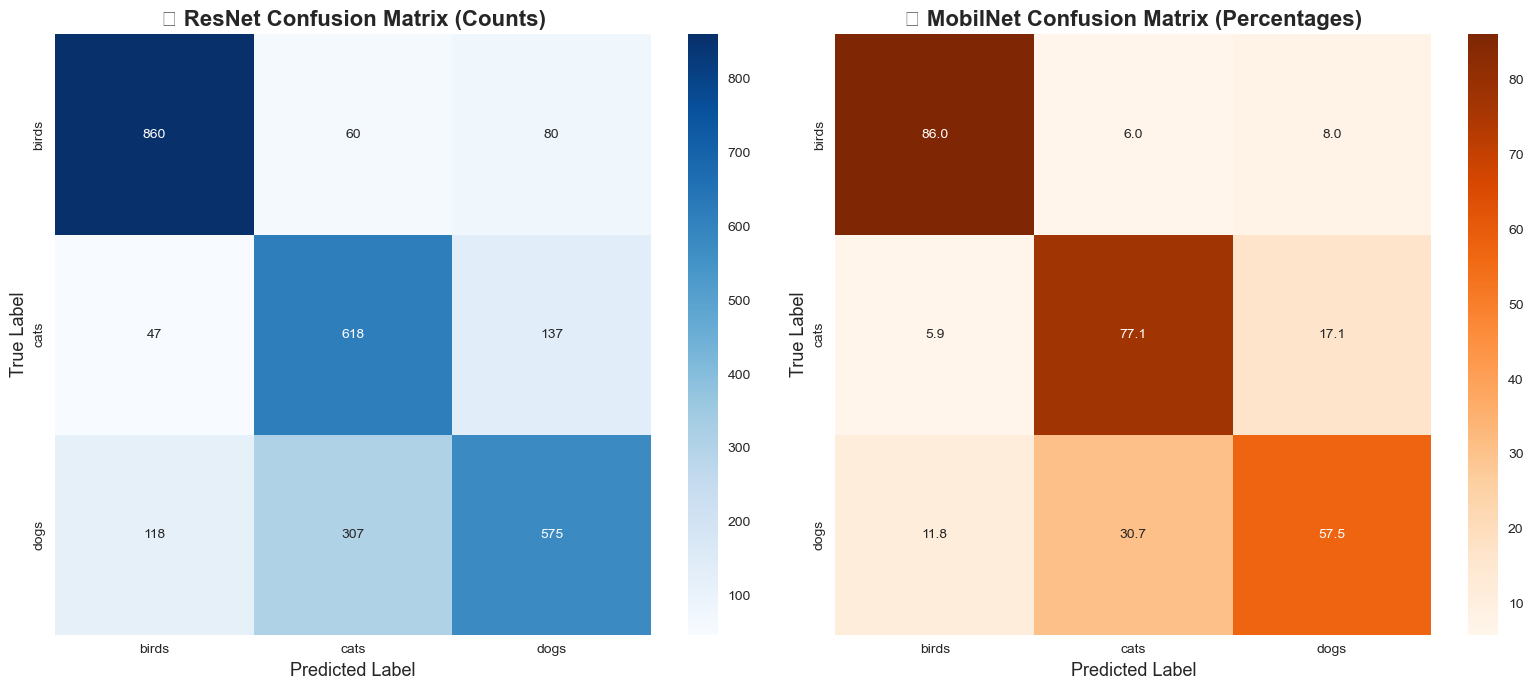


📈 Creating Advanced Metrics Dashboard...


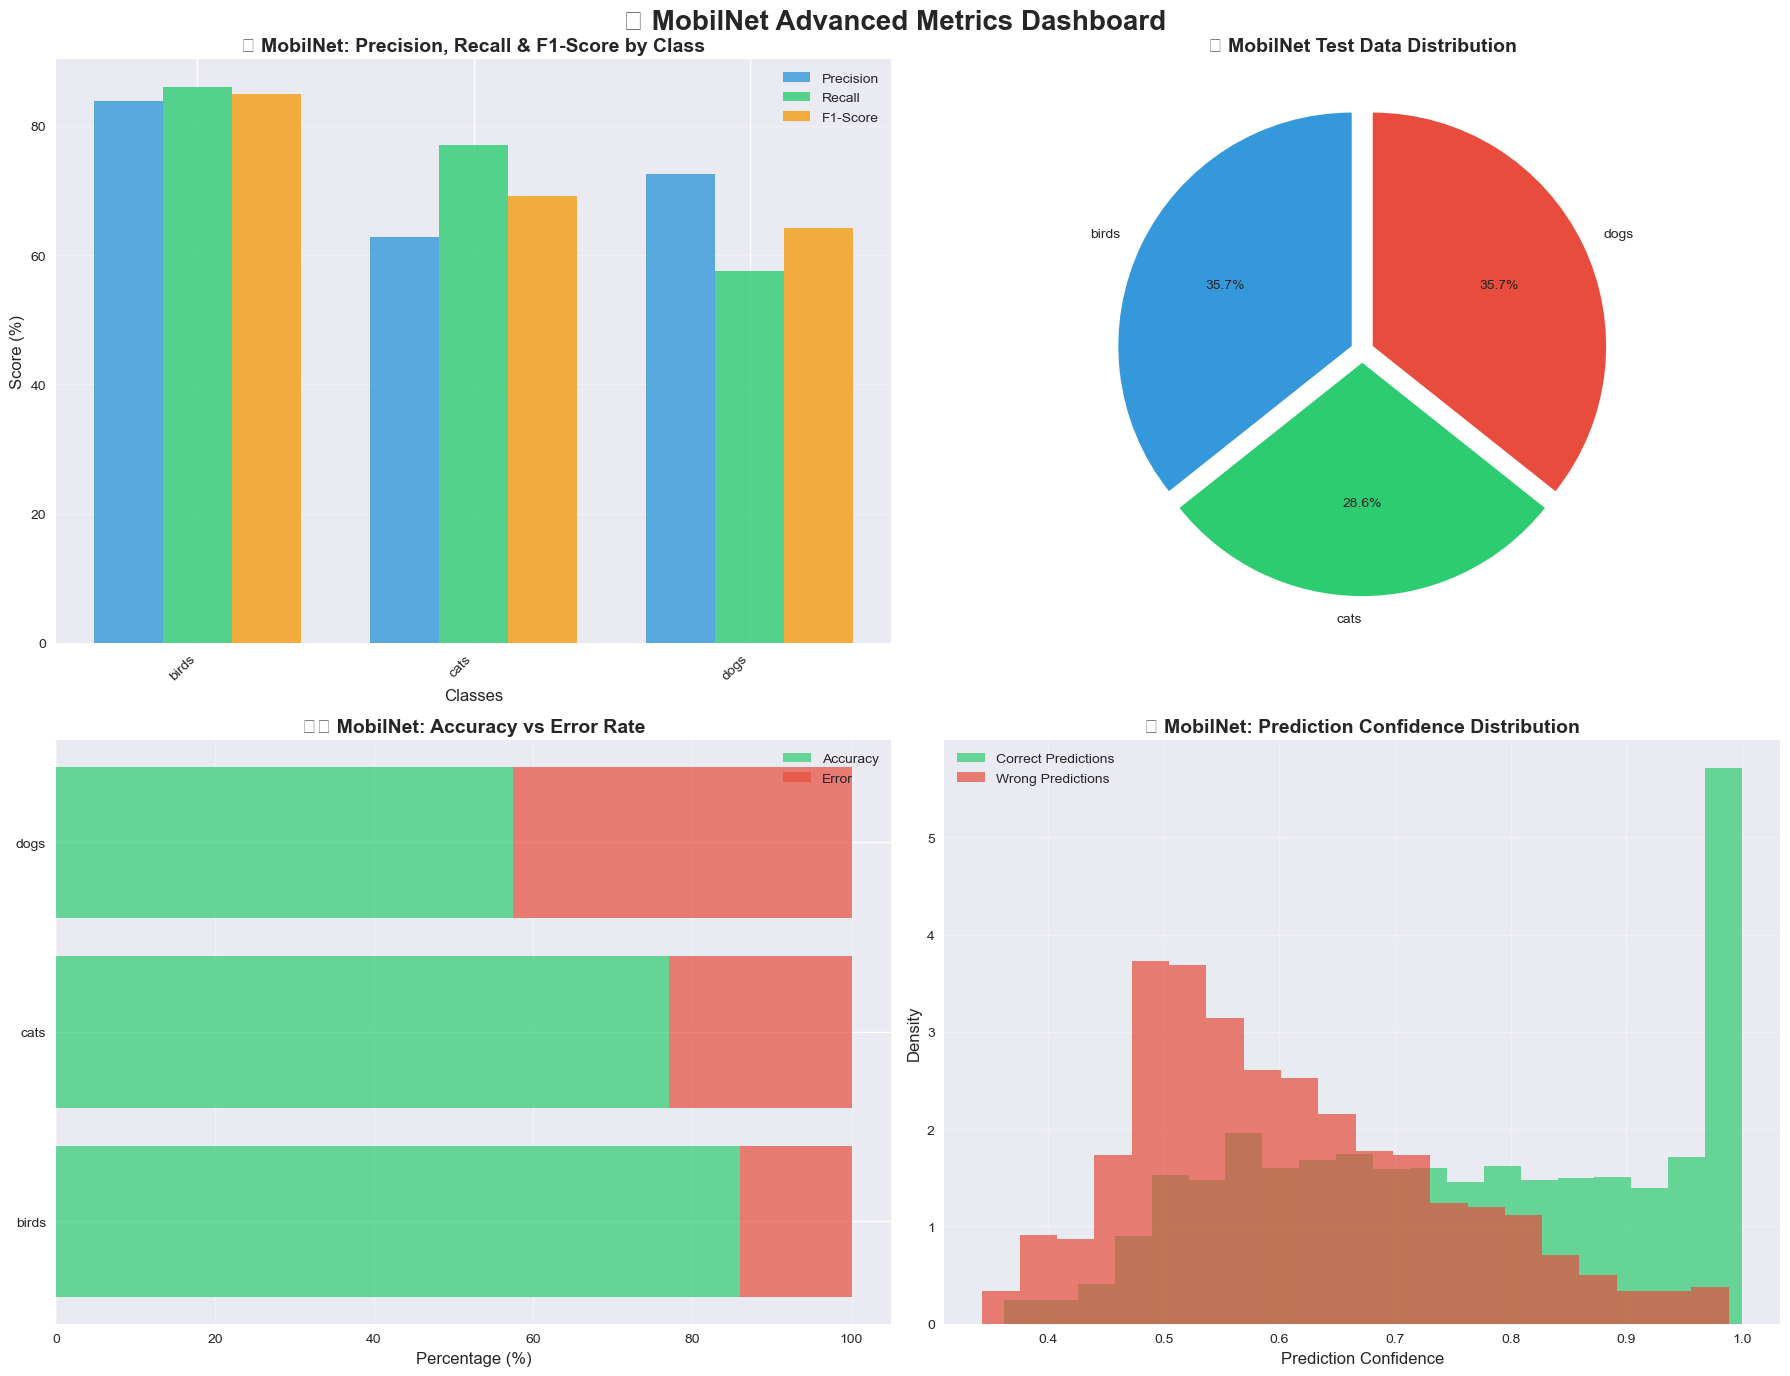


🎯 Plotting Confidence Analysis...


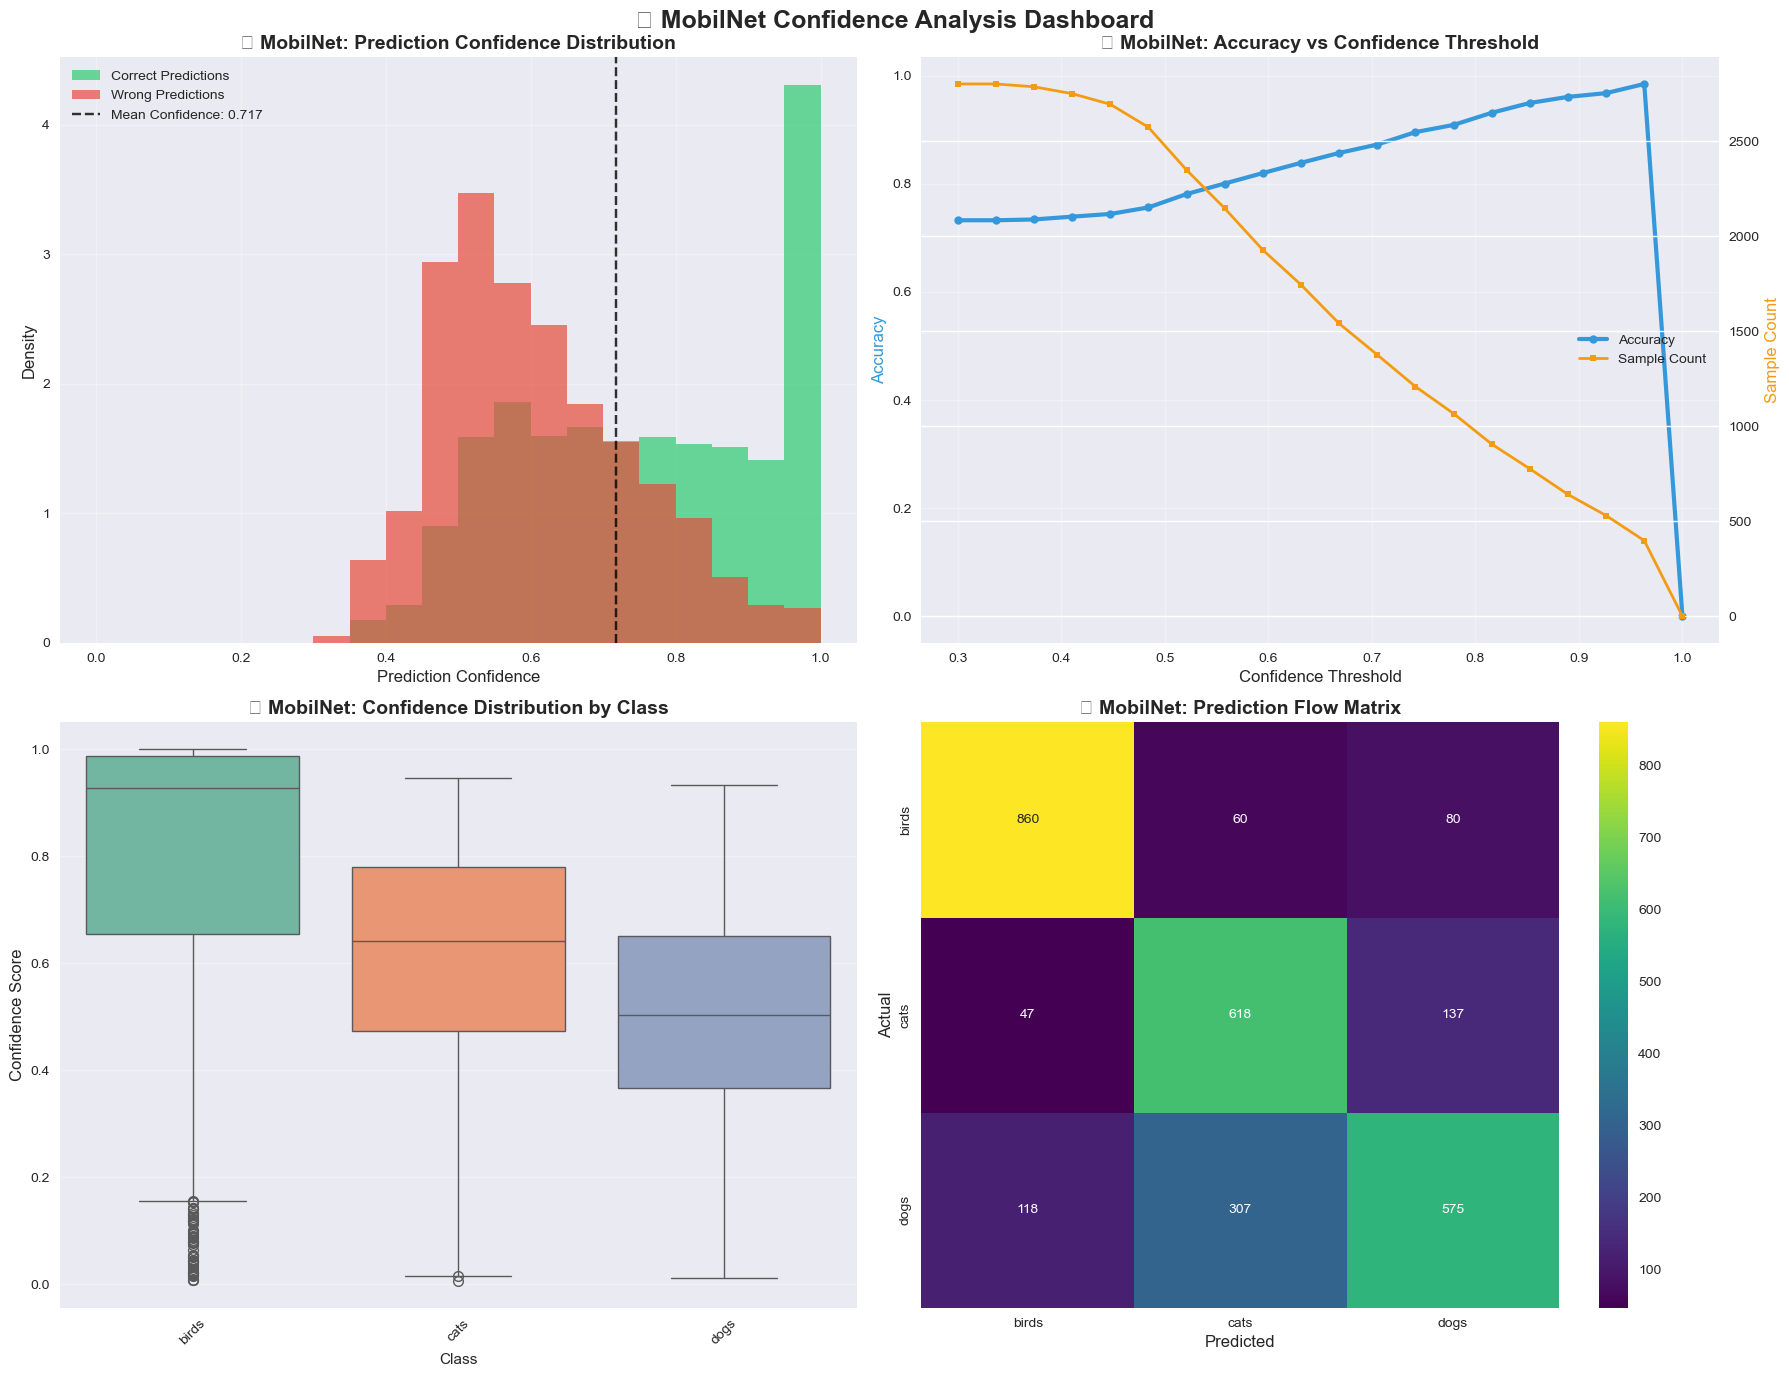


✨ Creating Performance Summary...


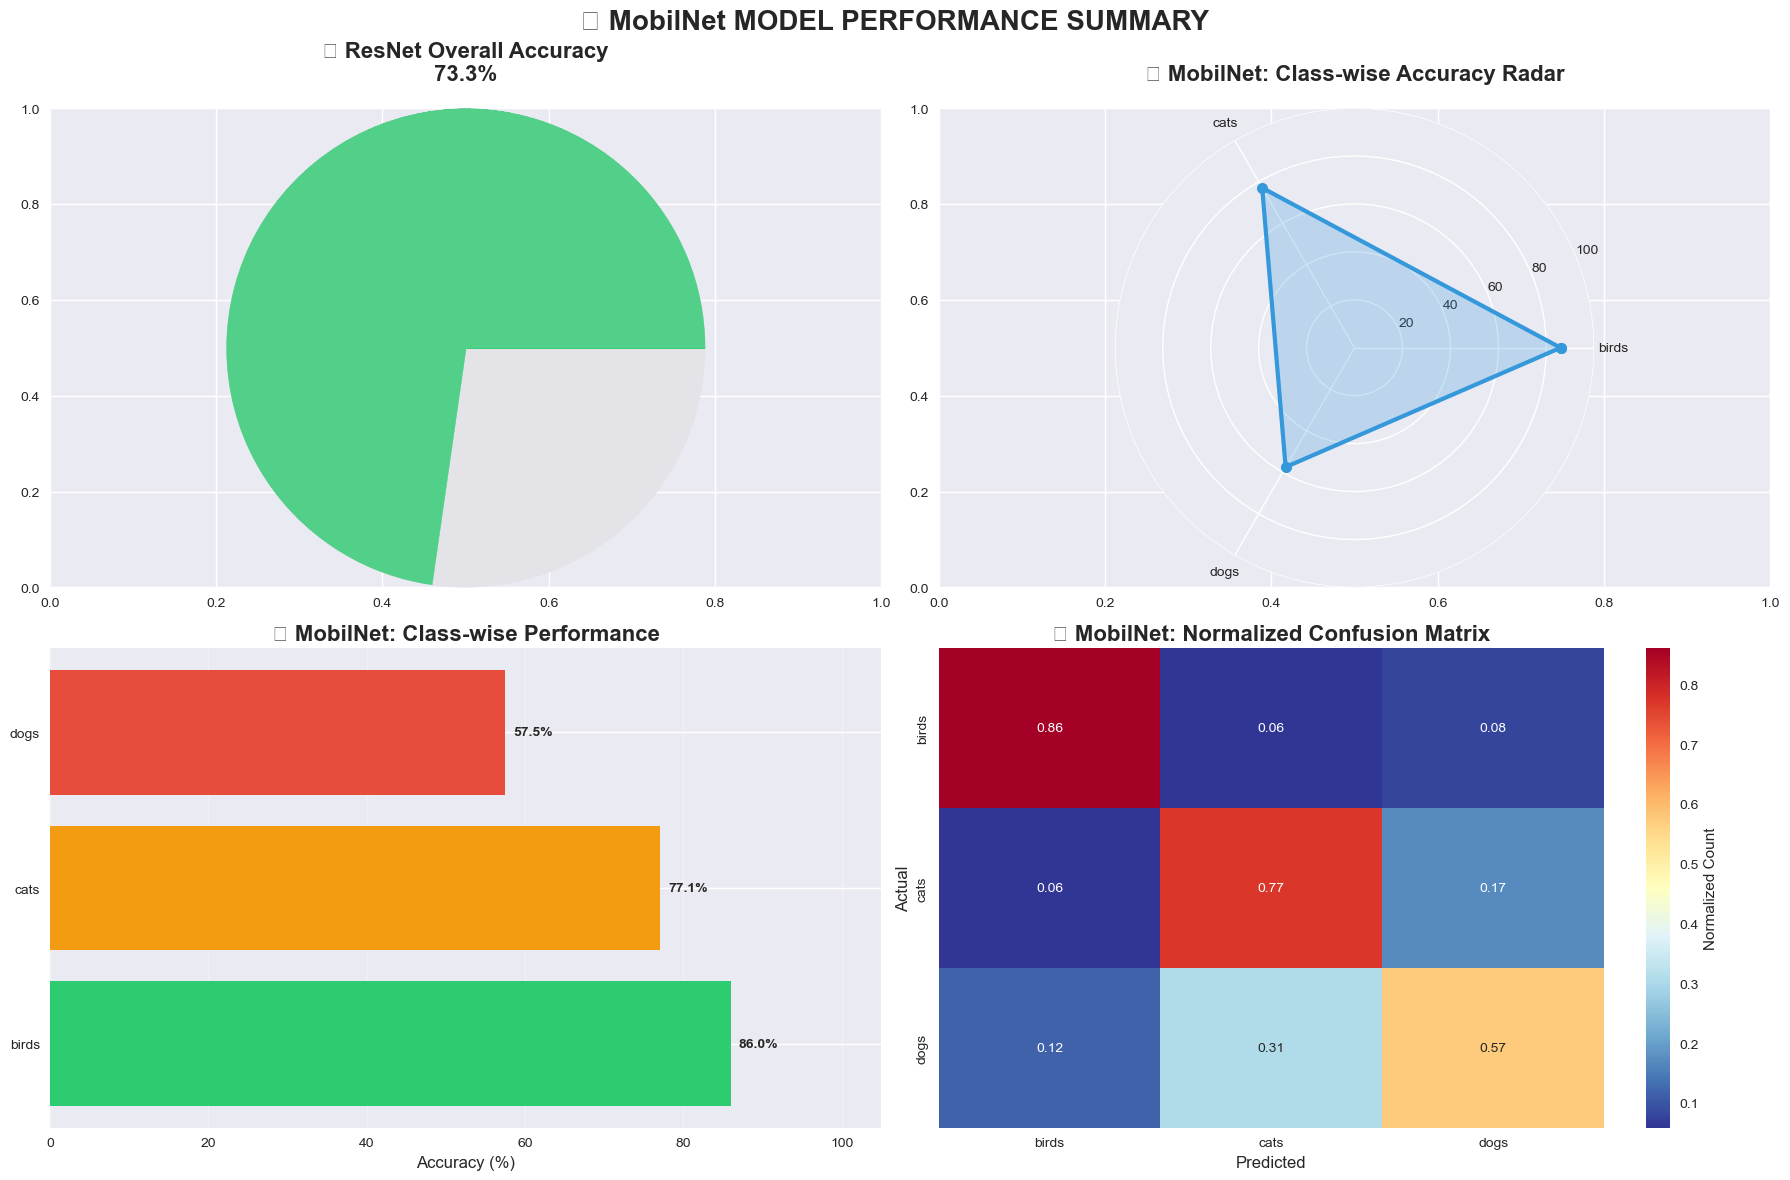


💾 Generating Detailed Report...
🎯 MobilNet COMPREHENSIVE EVALUATION REPORT

📊 MobilNet OVERALL PERFORMANCE:
├── Model Architecture: MobilNet
├── Test Accuracy: 0.7327 (73.27%)
├── Total Test Samples: 2802
├── Correct Predictions: 2053
└── Wrong Predictions: 749

📋 MobilNet DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       birds       0.84      0.86      0.85      1000
        cats       0.63      0.77      0.69       802
        dogs       0.73      0.57      0.64      1000

    accuracy                           0.73      2802
   macro avg       0.73      0.74      0.73      2802
weighted avg       0.74      0.73      0.73      2802


🔍 MobilNet CLASS-WISE DETAILED ANALYSIS:
├── birds:
│   ├── Accuracy: 0.8600 (86.00%)
│   ├── Avg Confidence: 0.7848
│   ├── Max Confidence: 1.0000
│   ├── Min Confidence: 0.0079
│   └── Sample Count: 1000
├── cats:
│   ├── Accuracy: 0.7706 (77.06%)
│   ├── Avg Confidence: 0.6031
│   ├── Max Confidence: 0.9458

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import os
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Create results directory
mobilnet_model_performance = 'mobilnet_model_performance'
if not os.path.exists(mobilnet_model_performance):
    os.makedirs(mobilnet_model_performance)
    print(f"'{mobilnet_model_performance}' klasörü oluşturuldu.")

# Set modern style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# --- 🎨 Enhanced Color Schemes ---
COLORS = {
    'primary': '#3498db',
    'success': '#2ecc71', 
    'danger': '#e74c3c',
    'warning': '#f39c12',
    'info': '#9b59b6',
    'dark': '#2c3e50'
}

class MobilNetAdvancedEvaluator:
    def __init__(self, mobilnet_model, test_loader, class_names, device):
        """
        Advanced evaluator for ResNet models
        
        Args:
            resnet_model: Trained ResNet model
            test_loader: DataLoader for test data
            class_names: List of class names
            device: torch.device (cuda/cpu)
        """
        self.model = mobilnet_model
        self.test_loader = test_loader
        self.class_names = class_names
        self.device = device
        self.all_labels = []
        self.all_preds = []
        self.all_probs = []
        
    def collect_predictions(self):
        """Collect all predictions and probabilities from ResNet"""
        print("🔄 Collecting ResNet predictions...")
        self.model.eval()
        
        with torch.no_grad():
            for batch_idx, (images, labels) in enumerate(self.test_loader):
                images, labels = images.to(self.device), labels.to(self.device)
                
                # Forward pass through ResNet
                outputs = self.model(images)
                probs = torch.softmax(outputs, dim=1)
                preds = outputs.argmax(1)
                
                self.all_labels.append(labels.cpu())
                self.all_preds.append(preds.cpu())
                self.all_probs.append(probs.cpu())
                
                # Progress indicator
                if batch_idx % 10 == 0:
                    print(f"  Processed {batch_idx + 1}/{len(self.test_loader)} batches")
                
        self.all_labels = torch.cat(self.all_labels).numpy()
        self.all_preds = torch.cat(self.all_preds).numpy()
        self.all_probs = torch.cat(self.all_probs).numpy()
        print("✅ MobilNet predictions collected!")

    
    def plot_enhanced_confusion_matrix(self):
        """Enhanced confusion matrix with percentages"""
        cm = confusion_matrix(self.all_labels, self.all_preds)
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
        
        # Raw counts
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=self.class_names, yticklabels=self.class_names, ax=ax1)
        ax1.set_title('🔢 ResNet Confusion Matrix (Counts)', fontsize=16, fontweight='bold')
        ax1.set_ylabel('True Label', fontsize=13)
        ax1.set_xlabel('Predicted Label', fontsize=13)
        
        # Percentages
        sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Oranges',
                   xticklabels=self.class_names, yticklabels=self.class_names, ax=ax2)
        ax2.set_title('📊 MobilNet Confusion Matrix (Percentages)', fontsize=16, fontweight='bold')
        ax2.set_ylabel('True Label', fontsize=13)
        ax2.set_xlabel('Predicted Label', fontsize=13)
        
        plt.tight_layout()
        plt.savefig(os.path.join(resnet_model_performance, 'mobilnet_confusion_matrix.png'), dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_advanced_metrics_dashboard(self):
        """Advanced metrics dashboard for MobilNet"""
        # Calculate metrics
        precision, recall, f1, support = precision_recall_fscore_support(
            self.all_labels, self.all_preds, average=None
        )
        
        # Create metrics DataFrame
        metrics_df = pd.DataFrame({
            'Class': self.class_names,
            'Precision': precision * 100,
            'Recall': recall * 100,
            'F1-Score': f1 * 100,
            'Support': support
        })
        
        # Create subplots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        fig.suptitle('🚀 MobilNet Advanced Metrics Dashboard', fontsize=20, fontweight='bold', y=0.98)
        
        # 1. Precision-Recall-F1 comparison
        x = np.arange(len(self.class_names))
        width = 0.25
        
        ax1.bar(x - width, metrics_df['Precision'], width, label='Precision', 
               color=COLORS['primary'], alpha=0.8)
        ax1.bar(x, metrics_df['Recall'], width, label='Recall', 
               color=COLORS['success'], alpha=0.8)
        ax1.bar(x + width, metrics_df['F1-Score'], width, label='F1-Score', 
               color=COLORS['warning'], alpha=0.8)
        
        ax1.set_xlabel('Classes', fontsize=12)
        ax1.set_ylabel('Score (%)', fontsize=12)
        ax1.set_title('📊 MobilNet: Precision, Recall & F1-Score by Class', fontweight='bold', fontsize=14)
        ax1.set_xticks(x)
        ax1.set_xticklabels(self.class_names, rotation=45, ha='right')
        ax1.legend()
        ax1.grid(axis='y', alpha=0.3)
        
        # 2. Class distribution (support)
        colors_pie = [COLORS['primary'], COLORS['success'], COLORS['danger'], COLORS['warning'], COLORS['info']][:len(self.class_names)]
        wedges, texts, autotexts = ax2.pie(metrics_df['Support'], labels=self.class_names, 
                                          colors=colors_pie, autopct='%1.1f%%', 
                                          startangle=90, explode=[0.05]*len(self.class_names))
        ax2.set_title('🥧 MobilNet Test Data Distribution', fontweight='bold', fontsize=14)
        
        # 3. Accuracy vs Error by class
        accuracy_per_class = []
        error_per_class = []
        for i, class_name in enumerate(self.class_names):
            mask = self.all_labels == i
            if mask.sum() > 0:
                acc = (self.all_preds[mask] == self.all_labels[mask]).mean() * 100
                accuracy_per_class.append(acc)
                error_per_class.append(100 - acc)
            else:
                accuracy_per_class.append(0)
                error_per_class.append(100)
        
        x_pos = np.arange(len(self.class_names))
        ax3.barh(x_pos, accuracy_per_class, color=COLORS['success'], alpha=0.7, label='Accuracy')
        ax3.barh(x_pos, error_per_class, left=accuracy_per_class, 
                color=COLORS['danger'], alpha=0.7, label='Error')
        ax3.set_yticks(x_pos)
        ax3.set_yticklabels(self.class_names)
        ax3.set_xlabel('Percentage (%)', fontsize=12)
        ax3.set_title('⚖️ MobilNet: Accuracy vs Error Rate', fontweight='bold', fontsize=14)
        ax3.legend()
        ax3.grid(axis='x', alpha=0.3)
        
        # 4. Prediction confidence distribution
        max_probs = np.max(self.all_probs, axis=1)
        correct_mask = self.all_labels == self.all_preds
        
        ax4.hist(max_probs[correct_mask], bins=20, alpha=0.7, 
                label='Correct Predictions', color=COLORS['success'], density=True)
        ax4.hist(max_probs[~correct_mask], bins=20, alpha=0.7, 
                label='Wrong Predictions', color=COLORS['danger'], density=True)
        ax4.set_xlabel('Prediction Confidence', fontsize=12)
        ax4.set_ylabel('Density', fontsize=12)
        ax4.set_title('🎯 MobilNet: Prediction Confidence Distribution', fontweight='bold', fontsize=14)
        ax4.legend()
        ax4.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(os.path.join(resnet_model_performance, 'mobilnet_metrics_dashboard.png'), dpi=300, bbox_inches='tight')
        plt.show()
        
        return metrics_df
    
    def plot_interactive_results(self):
        """Interactive Plotly visualizations for MobilNet"""
        # Calculate metrics
        precision, recall, f1, support = precision_recall_fscore_support(
            self.all_labels, self.all_preds, average=None
        )
        
        # Create interactive subplot
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('📊 MobilNet Metrics Comparison', '🎯 Confidence vs Accuracy', 
                          '📈 Performance Radar', '🔄 Class Distribution'),
            specs=[[{"type": "bar"}, {"type": "scatter"}],
                   [{"type": "scatterpolar"}, {"type": "pie"}]]
        )
        
        # 1. Metrics bar chart
        metrics = ['Precision', 'Recall', 'F1-Score']
        for i, metric in enumerate([precision, recall, f1]):
            fig.add_trace(
                go.Bar(x=self.class_names, y=metric*100, name=metrics[i],
                      marker_color=px.colors.qualitative.Set3[i]),
                row=1, col=1
            )
        
        # 2. Confidence vs Accuracy scatter
        max_probs = np.max(self.all_probs, axis=1)
        correct_mask = self.all_labels == self.all_preds
        
        fig.add_trace(
            go.Scatter(x=max_probs[correct_mask], y=[1]*correct_mask.sum(),
                      mode='markers', name='Correct', 
                      marker=dict(color='green', size=8, opacity=0.6)),
            row=1, col=2
        )
        fig.add_trace(
            go.Scatter(x=max_probs[~correct_mask], y=[0]*(~correct_mask).sum(),
                      mode='markers', name='Wrong',
                      marker=dict(color='red', size=8, opacity=0.6)),
            row=1, col=2
        )
        
        # 3. Radar chart for overall performance
        categories = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
        overall_acc = (self.all_labels == self.all_preds).mean()
        values = [precision.mean(), recall.mean(), f1.mean(), overall_acc]
        
        fig.add_trace(
            go.Scatterpolar(r=values, theta=categories, fill='toself',
                           name='MobilNet Performance', line_color='blue'),
            row=2, col=1
        )
        
        # 4. Class distribution pie chart
        fig.add_trace(
            go.Pie(labels=self.class_names, values=support, name="Distribution"),
            row=2, col=2
        )
        
        fig.update_layout(height=800, title_text="🚀 MobilNet Interactive Evaluation Dashboard")
        fig.show()
    
    def generate_detailed_report(self):
        """Generate comprehensive text report for ResNet"""
        overall_acc = (self.all_labels == self.all_preds).mean()
        
        print("=" * 70)
        print("🎯 MobilNet COMPREHENSIVE EVALUATION REPORT")
        print("=" * 70)
        
        print(f"\n📊 MobilNet OVERALL PERFORMANCE:")
        print(f"├── Model Architecture: MobilNet")
        print(f"├── Test Accuracy: {overall_acc:.4f} ({overall_acc*100:.2f}%)")
        print(f"├── Total Test Samples: {len(self.all_labels)}")
        print(f"├── Correct Predictions: {(self.all_labels == self.all_preds).sum()}")
        print(f"└── Wrong Predictions: {(self.all_labels != self.all_preds).sum()}")
        
        # Classification report
        print(f"\n📋 MobilNet DETAILED CLASSIFICATION REPORT:")
        print(classification_report(self.all_labels, self.all_preds, 
                                   target_names=self.class_names))
        
        # Class-wise detailed analysis
        print(f"\n🔍 MobilNet CLASS-WISE DETAILED ANALYSIS:")
        for i, class_name in enumerate(self.class_names):
            mask = self.all_labels == i
            if mask.sum() > 0:
                class_acc = (self.all_preds[mask] == self.all_labels[mask]).mean()
                avg_confidence = self.all_probs[mask, i].mean()
                max_confidence = self.all_probs[mask, i].max()
                min_confidence = self.all_probs[mask, i].min()
                
                print(f"├── {class_name}:")
                print(f"│   ├── Accuracy: {class_acc:.4f} ({class_acc*100:.2f}%)")
                print(f"│   ├── Avg Confidence: {avg_confidence:.4f}")
                print(f"│   ├── Max Confidence: {max_confidence:.4f}")
                print(f"│   ├── Min Confidence: {min_confidence:.4f}")
                print(f"│   └── Sample Count: {mask.sum()}")
        
        # Model confidence statistics
        max_probs = np.max(self.all_probs, axis=1)
        print(f"\n📈 MobilNet CONFIDENCE STATISTICS:")
        print(f"├── Average Confidence: {max_probs.mean():.4f}")
        print(f"├── Median Confidence: {np.median(max_probs):.4f}")
        print(f"├── Std Confidence: {max_probs.std():.4f}")
        print(f"├── Min Confidence: {max_probs.min():.4f}")
        print(f"└── Max Confidence: {max_probs.max():.4f}")
        
        print("=" * 70)
    
    def plot_prediction_confidence_analysis(self):
        """Advanced confidence analysis for ResNet"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        fig.suptitle('🎯 MobilNet Confidence Analysis Dashboard', fontsize=18, fontweight='bold', y=0.98)
        
        # 1. Confidence distribution by correctness
        max_probs = np.max(self.all_probs, axis=1)
        correct_mask = self.all_labels == self.all_preds
        
        # Create bins for confidence ranges
        bins = np.linspace(0, 1, 21)
        ax1.hist(max_probs[correct_mask], bins=bins, alpha=0.7, 
                label='Correct Predictions', color=COLORS['success'], density=True)
        ax1.hist(max_probs[~correct_mask], bins=bins, alpha=0.7, 
                label='Wrong Predictions', color=COLORS['danger'], density=True)
        ax1.axvline(max_probs.mean(), color='black', linestyle='--', alpha=0.8, 
                   label=f'Mean Confidence: {max_probs.mean():.3f}')
        ax1.set_xlabel('Prediction Confidence', fontsize=12)
        ax1.set_ylabel('Density', fontsize=12)
        ax1.set_title('🎯 MobilNet: Prediction Confidence Distribution', fontweight='bold', fontsize=14)
        ax1.legend()
        ax1.grid(alpha=0.3)
        
        # 2. Confidence vs Accuracy curve
        confidence_thresholds = np.linspace(0.3, 1.0, 20)
        accuracies = []
        sample_counts = []
        
        for threshold in confidence_thresholds:
            high_conf_mask = max_probs >= threshold
            if high_conf_mask.sum() > 0:
                acc = (self.all_labels[high_conf_mask] == self.all_preds[high_conf_mask]).mean()
                accuracies.append(acc)
                sample_counts.append(high_conf_mask.sum())
            else:
                accuracies.append(0)
                sample_counts.append(0)
        
        ax2_twin = ax2.twinx()
        line1 = ax2.plot(confidence_thresholds, accuracies, 'o-', 
                        color=COLORS['primary'], linewidth=3, markersize=6, label='Accuracy')
        line2 = ax2_twin.plot(confidence_thresholds, sample_counts, 's-', 
                             color=COLORS['warning'], linewidth=2, markersize=4, label='Sample Count')
        
        ax2.set_xlabel('Confidence Threshold', fontsize=12)
        ax2.set_ylabel('Accuracy', color=COLORS['primary'], fontsize=12)
        ax2_twin.set_ylabel('Sample Count', color=COLORS['warning'], fontsize=12)
        ax2.set_title('📈 MobilNet: Accuracy vs Confidence Threshold', fontweight='bold', fontsize=14)
        ax2.grid(alpha=0.3)
        
        # Combine legends
        lines1, labels1 = ax2.get_legend_handles_labels()
        lines2, labels2 = ax2_twin.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='center right')
        
        # 3. Class-wise confidence boxplot
        confidence_by_class = []
        class_labels = []
        
        for i, class_name in enumerate(self.class_names):
            mask = self.all_labels == i
            if mask.sum() > 0:
                confidence_by_class.extend(self.all_probs[mask, i])
                class_labels.extend([class_name] * mask.sum())
        
        conf_df = pd.DataFrame({'Class': class_labels, 'Confidence': confidence_by_class})
        sns.boxplot(data=conf_df, x='Class', y='Confidence', ax=ax3, palette='Set2')
        ax3.set_title('📦 MobilNet: Confidence Distribution by Class', fontweight='bold', fontsize=14)
        ax3.set_ylabel('Confidence Score', fontsize=12)
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(axis='y', alpha=0.3)
        
        # 4. Prediction matrix heatmap
        pred_matrix = np.zeros((len(self.class_names), len(self.class_names)))
        for true_idx in range(len(self.class_names)):
            for pred_idx in range(len(self.class_names)):
                mask = (self.all_labels == true_idx) & (self.all_preds == pred_idx)
                pred_matrix[true_idx, pred_idx] = mask.sum()
        
        sns.heatmap(pred_matrix, annot=True, fmt='.0f', cmap='viridis',
                   xticklabels=self.class_names, yticklabels=self.class_names, ax=ax4)
        ax4.set_title('🎨 MobilNet: Prediction Flow Matrix', fontweight='bold', fontsize=14)
        ax4.set_xlabel('Predicted', fontsize=12)
        ax4.set_ylabel('Actual', fontsize=12)
        
        plt.tight_layout()
        plt.savefig(os.path.join(resnet_model_performance, 'mobilnet_confidence_analysis.png'), dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_model_performance_summary(self):
        """Beautiful summary visualization for ResNet"""
        overall_acc = (self.all_labels == self.all_preds).mean()
        
        # Calculate per-class accuracies
        class_accuracies = []
        for i in range(len(self.class_names)):
            mask = self.all_labels == i
            if mask.sum() > 0:
                acc = (self.all_preds[mask] == self.all_labels[mask]).mean()
                class_accuracies.append(acc * 100)
            else:
                class_accuracies.append(0)
        
        # Create elegant summary plot
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
        fig.suptitle('🎯 MobilNet MODEL PERFORMANCE SUMMARY', fontsize=20, fontweight='bold', y=0.98)
        
        # 1. Overall accuracy gauge
        theta = np.linspace(0, 2*np.pi, 100)
        r = np.ones_like(theta)
        
        ax1 = plt.subplot(221, projection='polar')
        ax1.fill_between(theta, 0, r, alpha=0.3, color='lightgray')
        
        # Fill accuracy portion
        acc_theta = theta[:int(overall_acc * 100)]
        if len(acc_theta) > 0:
            ax1.fill_between(acc_theta, 0, r[:len(acc_theta)], 
                           color=COLORS['success'], alpha=0.8)
        
        ax1.set_ylim(0, 1)
        ax1.set_title(f'🎯 ResNet Overall Accuracy\n{overall_acc*100:.1f}%', 
                     fontweight='bold', fontsize=16, pad=20)
        ax1.set_rticks([])
        ax1.set_thetagrids([])
        
        # 2. Class accuracy radar
        ax2 = plt.subplot(222, projection='polar')
        angles = np.linspace(0, 2*np.pi, len(self.class_names), endpoint=False)
        angles = np.concatenate((angles, [angles[0]]))  # Complete the circle
        
        values = class_accuracies + [class_accuracies[0]]
        ax2.plot(angles, values, 'o-', linewidth=3, color=COLORS['primary'], markersize=8)
        ax2.fill(angles, values, alpha=0.25, color=COLORS['primary'])
        ax2.set_xticks(angles[:-1])
        ax2.set_xticklabels(self.class_names)
        ax2.set_ylim(0, 100)
        ax2.set_title('🔄 MobilNet: Class-wise Accuracy Radar', fontweight='bold', fontsize=16, pad=20)
        ax2.grid(True)
        
        # 3. Stylized accuracy bars
        ax3 = plt.subplot(223)
        bars = ax3.barh(self.class_names, class_accuracies, 
                       color=[COLORS['success'] if acc > 80 else COLORS['warning'] if acc > 60 
                             else COLORS['danger'] for acc in class_accuracies])
        
        # Add value labels
        for i, (bar, acc) in enumerate(zip(bars, class_accuracies)):
            ax3.text(acc + 1, i, f'{acc:.1f}%', va='center', fontweight='bold')
        
        ax3.set_xlabel('Accuracy (%)', fontsize=12)
        ax3.set_title('📊 MobilNet: Class-wise Performance', fontweight='bold', fontsize=16)
        ax3.set_xlim(0, 105)
        ax3.grid(axis='x', alpha=0.3)
        
        # 4. Confusion matrix heatmap (elegant)
        ax4 = plt.subplot(224)
        cm = confusion_matrix(self.all_labels, self.all_preds)
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='RdYlBu_r',
                   xticklabels=self.class_names, yticklabels=self.class_names, 
                   ax=ax4, cbar_kws={'label': 'Normalized Count'})
        ax4.set_title('🎨 MobilNet: Normalized Confusion Matrix', fontweight='bold', fontsize=16)
        ax4.set_xlabel('Predicted', fontsize=12)
        ax4.set_ylabel('Actual', fontsize=12)
        
        plt.tight_layout()
        plt.savefig(os.path.join(resnet_model_performance, 'MobilNet_performance_summary.png'), dpi=300, bbox_inches='tight')
        plt.show()
    
    def save_detailed_results(self):
        """Save comprehensive results to files"""
        # Save predictions
        results_df = pd.DataFrame({
            'True_Label': [self.class_names[label] for label in self.all_labels],
            'Predicted_Label': [self.class_names[pred] for pred in self.all_preds],
            'Correct': self.all_labels == self.all_preds,
            'Confidence': np.max(self.all_probs, axis=1)
        })
        
        # Add individual class probabilities
        for i, class_name in enumerate(self.class_names):
            results_df[f'Prob_{class_name}'] = self.all_probs[:, i]
        
        # Save to CSV
        csv_path = os.path.join(resnet_model_performance, 'MobilNet_Detailed_Test_Results.csv')
        results_df.to_csv(csv_path, index=False)
        print(f"✅ Detailed MobilNet results saved to '{csv_path}'")
        
        # Save summary statistics
        summary_stats = {
            'Overall_Accuracy': (self.all_labels == self.all_preds).mean(),
            'Total_Samples': len(self.all_labels),
            'Correct_Predictions': (self.all_labels == self.all_preds).sum(),
            'Wrong_Predictions': (self.all_labels != self.all_preds).sum(),
            'Average_Confidence': np.max(self.all_probs, axis=1).mean(),
            'Model_Type': 'MobilNet'
        }
        
        summary_df = pd.DataFrame([summary_stats])
        summary_path = os.path.join(resnet_model_performance, 'MobilNet_Summary_Statistics.csv')
        summary_df.to_csv(summary_path, index=False)
        print(f"✅ MobilNet summary statistics saved to '{summary_path}'")
        
        return results_df

    def run_complete_evaluation(self):
        """Run the complete evaluation pipeline"""
        print("🚀 Starting MobilNet Advanced Model Evaluation...")
        
        # Collect predictions
        self.collect_predictions()
        
        print("\n📊 Generating Enhanced Confusion Matrix...")
        self.plot_enhanced_confusion_matrix()
        
        print("\n📈 Creating Advanced Metrics Dashboard...")
        metrics_df = self.plot_advanced_metrics_dashboard()
        
        print("\n🎯 Plotting Confidence Analysis...")
        self.plot_prediction_confidence_analysis()
        
        print("\n✨ Creating Performance Summary...")
        self.plot_model_performance_summary()
        
        print("\n🌐 Generating Interactive Plots...")
        self.plot_interactive_results()
        
        print("\n💾 Generating Detailed Report...")
        self.generate_detailed_report()
        
        print("\n📁 Saving Results...")
        results_df = self.save_detailed_results()
        
        print(f"\n🎉 MobilNet Evaluation Complete!")
        print(f"📊 Check the '{mobilnet_model_performance}' directory for all visualizations and results.")
        
        return results_df, metrics_df


# --- 🚀 USAGE EXAMPLE ---
# Initialize evaluator
class_names = test_dataset.classes
evaluator = MobilNetAdvancedEvaluator(model_m, test_loader, class_names, device)

# Run comprehensive evaluation
print("🚀 Starting Advanced Model Evaluation...")
evaluator.collect_predictions()

print("\n📊 Generating Enhanced Confusion Matrix...")
evaluator.plot_enhanced_confusion_matrix()

print("\n📈 Creating Advanced Metrics Dashboard...")
metrics_df = evaluator.plot_advanced_metrics_dashboard()

print("\n🎯 Plotting Confidence Analysis...")
evaluator.plot_prediction_confidence_analysis()

print("\n✨ Creating Performance Summary...")
evaluator.plot_model_performance_summary()

print("\n💾 Generating Detailed Report...")
evaluator.generate_detailed_report()

print("\n📁 Saving Results...")
results_df = evaluator.save_detailed_results()

print("\n🎉 Evaluation Complete!")
print("📊 Check the generated visualizations and CSV file for detailed insights.")

##### resnet

In [ ]:
from torchvision import models, datasets, transforms
import torch
from torch.utils.data import DataLoader

transform_val_test = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet-18 standart giriş boyutu
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_dir  = r"enter path"
test_dataset  = datasets.ImageFolder(test_dir, transform=transform_val_test)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)

num_classes = len(test_dataset.classes)  # test klasöründeki sınıf sayısı

model_r = models.resnet18(weights=None)
model_r.fc = torch.nn.Linear(model_r.fc.in_features, num_classes)  # final layer
model_r = model_r.to(device)

save_path = "resnet18_rgb_model_colab.pth"
model_r.load_state_dict(torch.load(save_path, map_location=device))
model_r.eval()
print("✅ ResNet-18 RGB model loaded successfully")


✅ ResNet-18 RGB model loaded successfully


'resnet_model_performance' klasörü oluşturuldu.
🚀 Starting Advanced Model Evaluation...
🔄 Collecting ResNet predictions...
  Processed 1/176 batches
  Processed 11/176 batches
  Processed 21/176 batches
  Processed 31/176 batches
  Processed 41/176 batches
  Processed 51/176 batches
  Processed 61/176 batches
  Processed 71/176 batches
  Processed 81/176 batches
  Processed 91/176 batches
  Processed 101/176 batches
  Processed 111/176 batches
  Processed 121/176 batches
  Processed 131/176 batches
  Processed 141/176 batches
  Processed 151/176 batches
  Processed 161/176 batches
  Processed 171/176 batches
✅ ResNet predictions collected!

📊 Generating Enhanced Confusion Matrix...


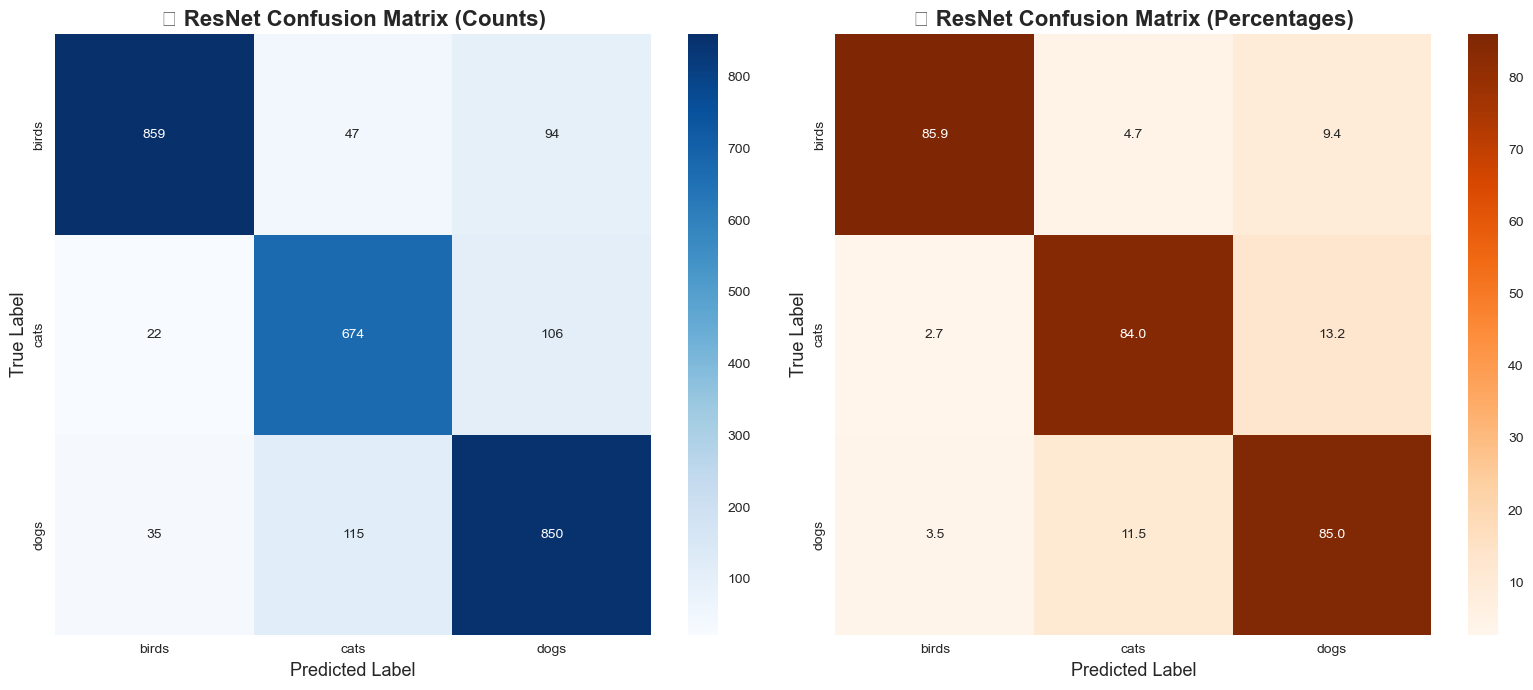


📈 Creating Advanced Metrics Dashboard...


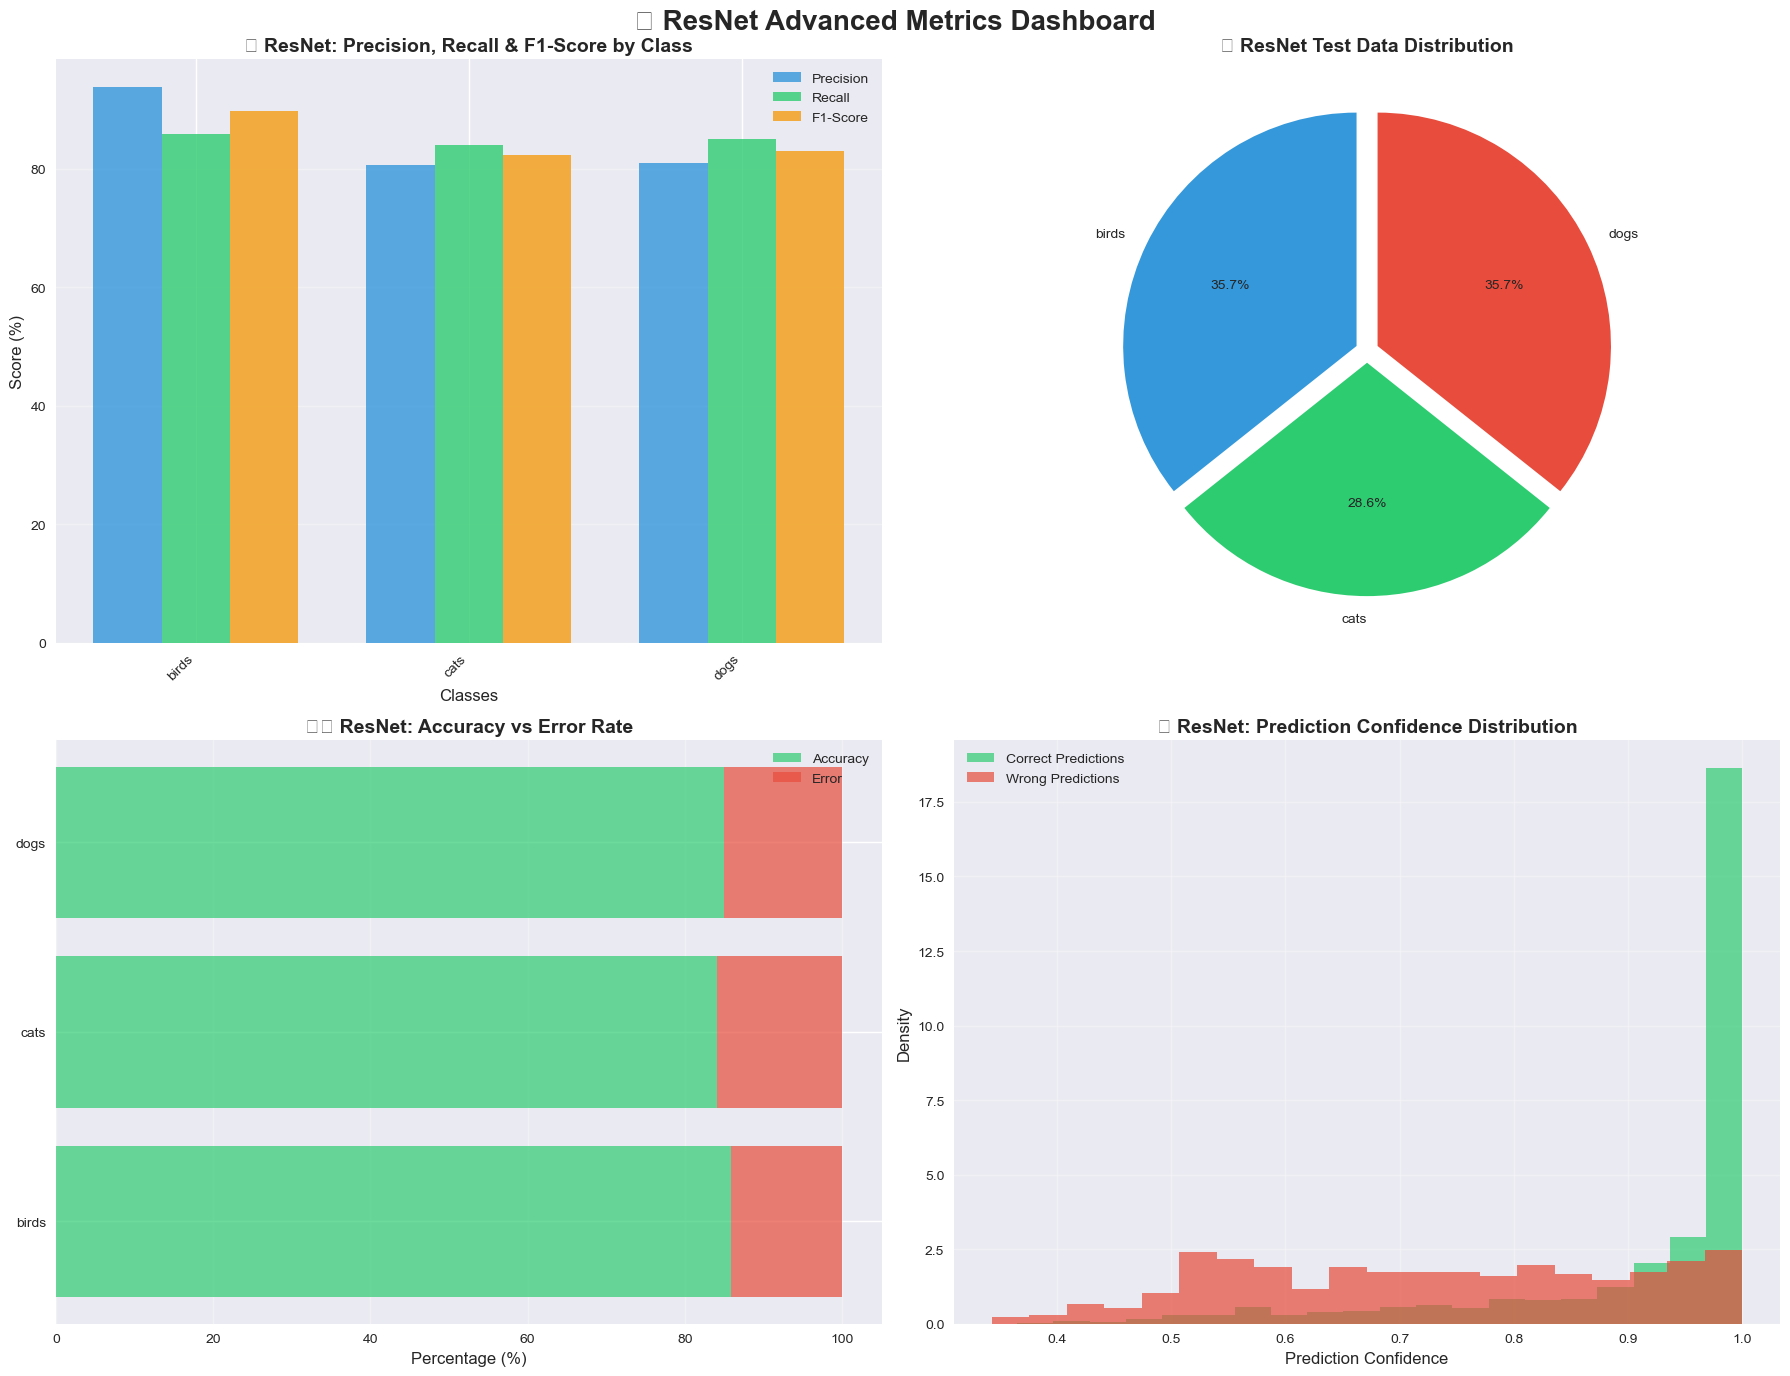


🎯 Plotting Confidence Analysis...


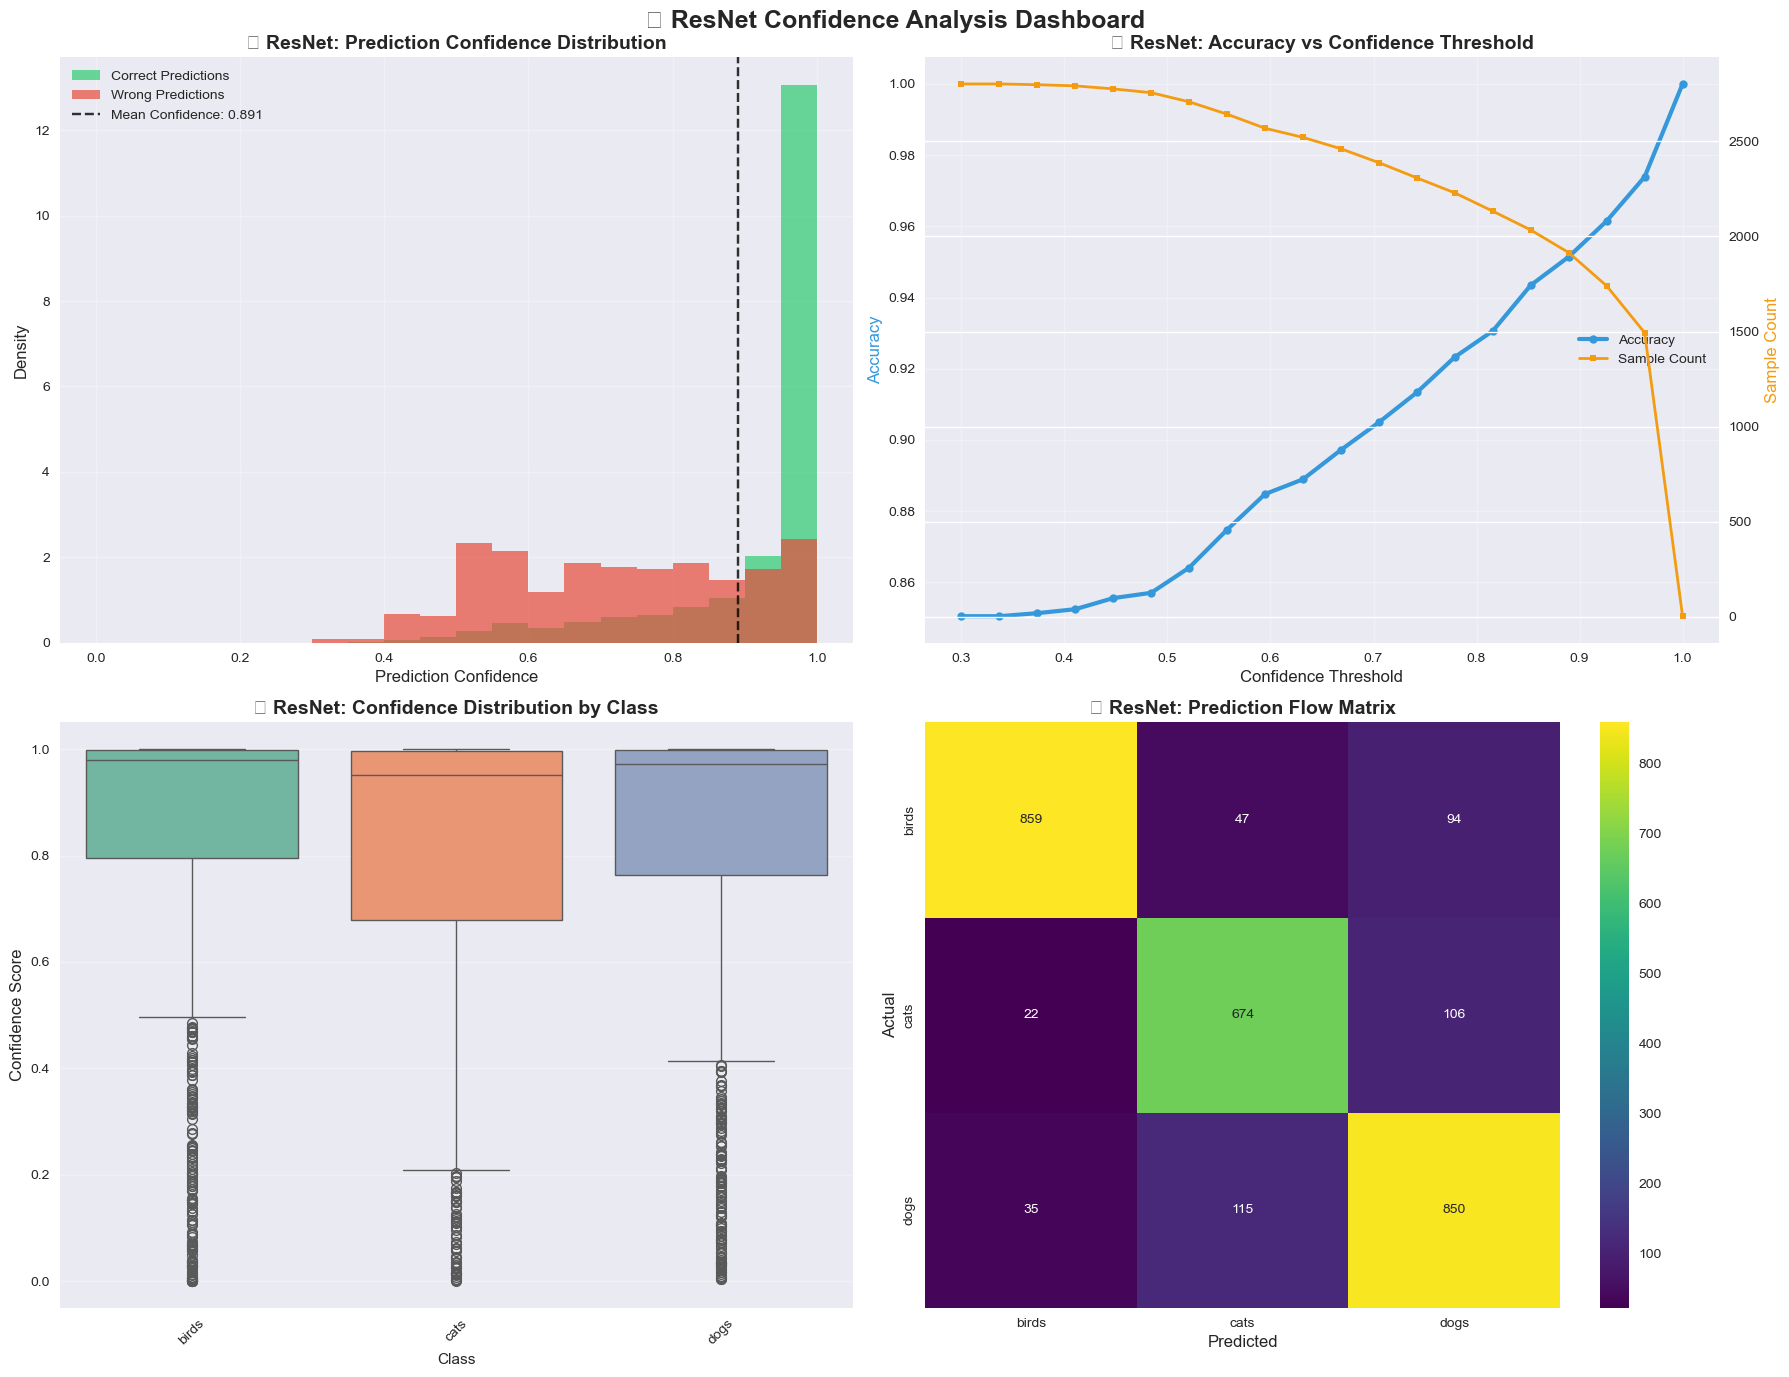


✨ Creating Performance Summary...


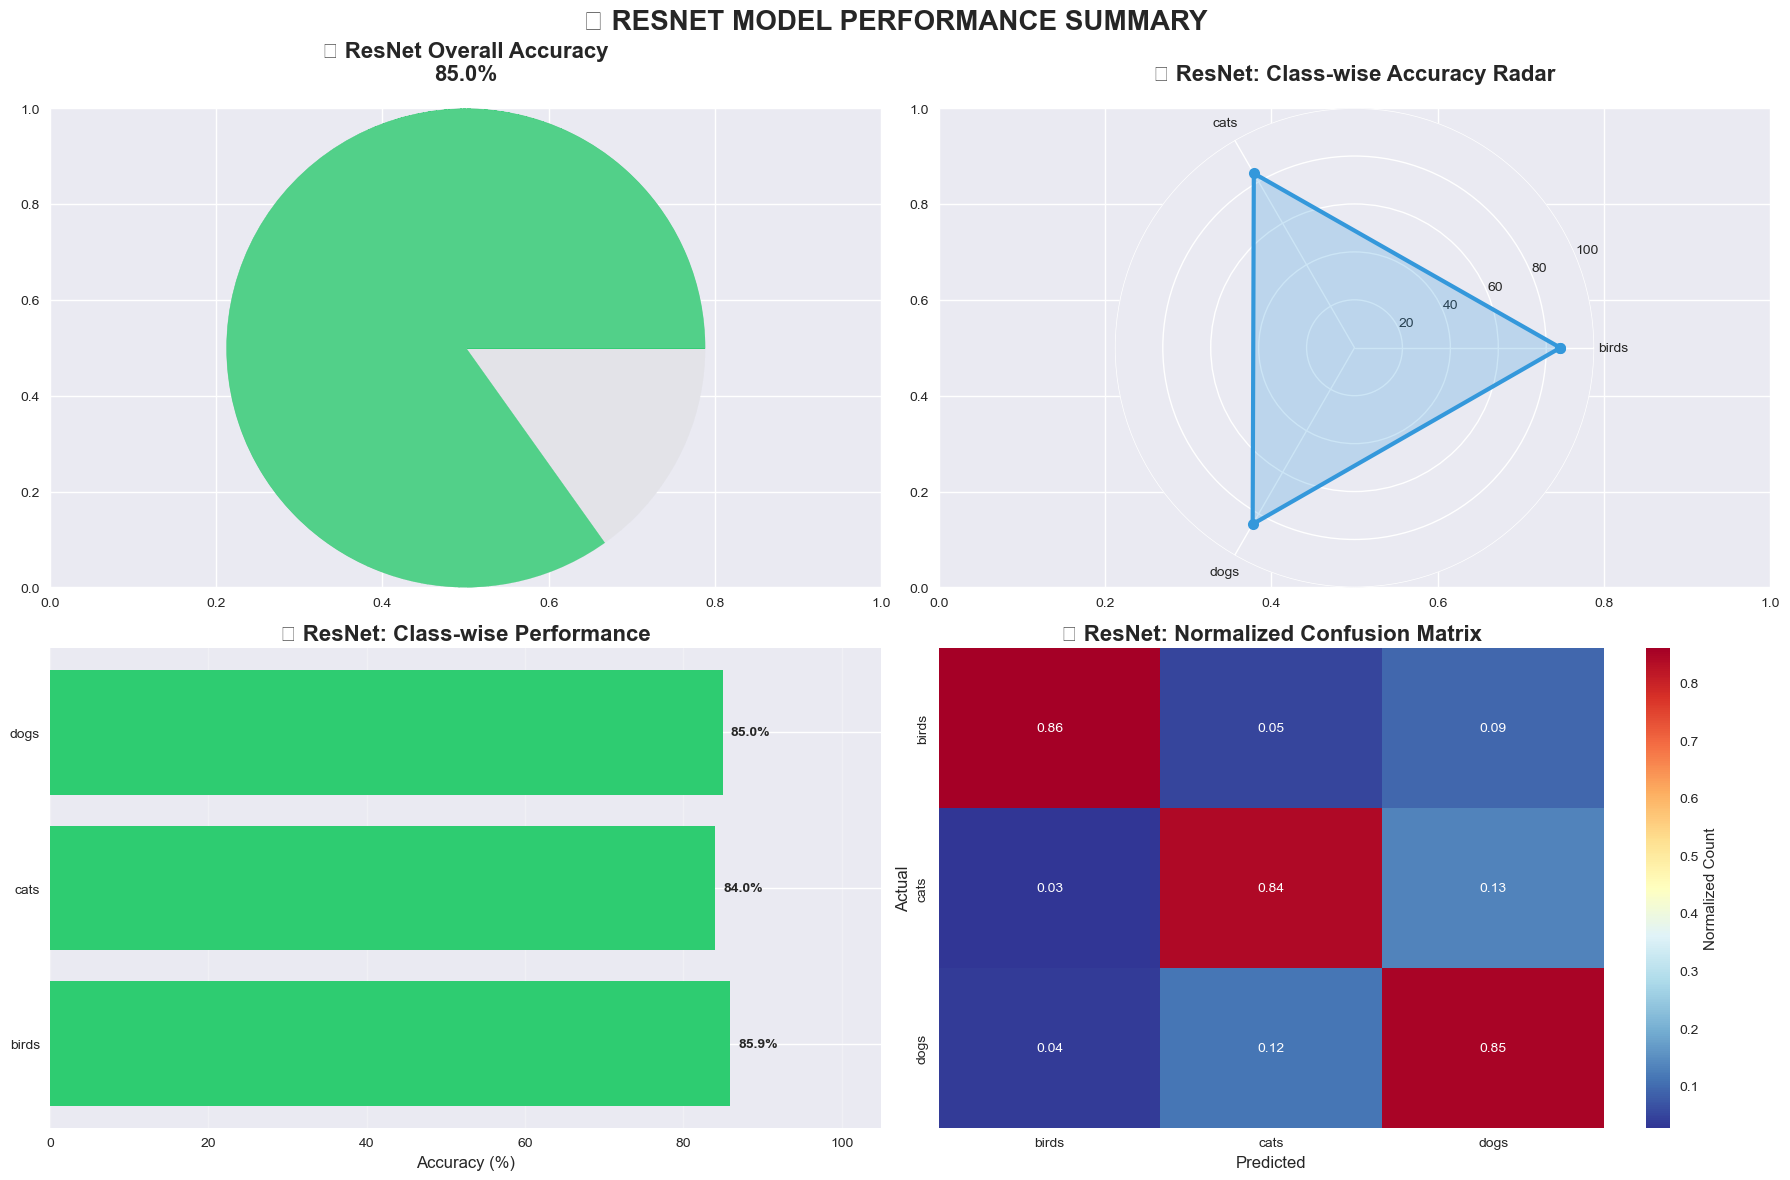


💾 Generating Detailed Report...
🎯 RESNET COMPREHENSIVE EVALUATION REPORT

📊 RESNET OVERALL PERFORMANCE:
├── Model Architecture: ResNet
├── Test Accuracy: 0.8505 (85.05%)
├── Total Test Samples: 2802
├── Correct Predictions: 2383
└── Wrong Predictions: 419

📋 RESNET DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       birds       0.94      0.86      0.90      1000
        cats       0.81      0.84      0.82       802
        dogs       0.81      0.85      0.83      1000

    accuracy                           0.85      2802
   macro avg       0.85      0.85      0.85      2802
weighted avg       0.85      0.85      0.85      2802


🔍 RESNET CLASS-WISE DETAILED ANALYSIS:
├── birds:
│   ├── Accuracy: 0.8590 (85.90%)
│   ├── Avg Confidence: 0.8219
│   ├── Max Confidence: 1.0000
│   ├── Min Confidence: 0.0000
│   └── Sample Count: 1000
├── cats:
│   ├── Accuracy: 0.8404 (84.04%)
│   ├── Avg Confidence: 0.7957
│   ├── Max Confidence: 1.0000
│   ├── M

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import os
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Create results directory
resnet_model_performance = 'resnet_model_performance'
if not os.path.exists(resnet_model_performance):
    os.makedirs(resnet_model_performance)
    print(f"'{resnet_model_performance}' klasörü oluşturuldu.")

# Set modern style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# --- 🎨 Enhanced Color Schemes ---
COLORS = {
    'primary': '#3498db',
    'success': '#2ecc71', 
    'danger': '#e74c3c',
    'warning': '#f39c12',
    'info': '#9b59b6',
    'dark': '#2c3e50'
}

class ResNetAdvancedEvaluator:
    def __init__(self, resnet_model, test_loader, class_names, device):
        """
        Advanced evaluator for ResNet models
        
        Args:
            resnet_model: Trained ResNet model
            test_loader: DataLoader for test data
            class_names: List of class names
            device: torch.device (cuda/cpu)
        """
        self.model = resnet_model
        self.test_loader = test_loader
        self.class_names = class_names
        self.device = device
        self.all_labels = []
        self.all_preds = []
        self.all_probs = []
        
    def collect_predictions(self):
        """Collect all predictions and probabilities from ResNet"""
        print("🔄 Collecting ResNet predictions...")
        self.model.eval()
        
        with torch.no_grad():
            for batch_idx, (images, labels) in enumerate(self.test_loader):
                images, labels = images.to(self.device), labels.to(self.device)
                
                # Forward pass through ResNet
                outputs = self.model(images)
                probs = torch.softmax(outputs, dim=1)
                preds = outputs.argmax(1)
                
                self.all_labels.append(labels.cpu())
                self.all_preds.append(preds.cpu())
                self.all_probs.append(probs.cpu())
                
                # Progress indicator
                if batch_idx % 10 == 0:
                    print(f"  Processed {batch_idx + 1}/{len(self.test_loader)} batches")
                
        self.all_labels = torch.cat(self.all_labels).numpy()
        self.all_preds = torch.cat(self.all_preds).numpy()
        self.all_probs = torch.cat(self.all_probs).numpy()
        print("✅ ResNet predictions collected!")

    
    def plot_enhanced_confusion_matrix(self):
        """Enhanced confusion matrix with percentages"""
        cm = confusion_matrix(self.all_labels, self.all_preds)
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
        
        # Raw counts
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=self.class_names, yticklabels=self.class_names, ax=ax1)
        ax1.set_title('🔢 ResNet Confusion Matrix (Counts)', fontsize=16, fontweight='bold')
        ax1.set_ylabel('True Label', fontsize=13)
        ax1.set_xlabel('Predicted Label', fontsize=13)
        
        # Percentages
        sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Oranges',
                   xticklabels=self.class_names, yticklabels=self.class_names, ax=ax2)
        ax2.set_title('📊 ResNet Confusion Matrix (Percentages)', fontsize=16, fontweight='bold')
        ax2.set_ylabel('True Label', fontsize=13)
        ax2.set_xlabel('Predicted Label', fontsize=13)
        
        plt.tight_layout()
        plt.savefig(os.path.join(resnet_model_performance, 'resnet_confusion_matrix.png'), dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_advanced_metrics_dashboard(self):
        """Advanced metrics dashboard for ResNet"""
        # Calculate metrics
        precision, recall, f1, support = precision_recall_fscore_support(
            self.all_labels, self.all_preds, average=None
        )
        
        # Create metrics DataFrame
        metrics_df = pd.DataFrame({
            'Class': self.class_names,
            'Precision': precision * 100,
            'Recall': recall * 100,
            'F1-Score': f1 * 100,
            'Support': support
        })
        
        # Create subplots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        fig.suptitle('🚀 ResNet Advanced Metrics Dashboard', fontsize=20, fontweight='bold', y=0.98)
        
        # 1. Precision-Recall-F1 comparison
        x = np.arange(len(self.class_names))
        width = 0.25
        
        ax1.bar(x - width, metrics_df['Precision'], width, label='Precision', 
               color=COLORS['primary'], alpha=0.8)
        ax1.bar(x, metrics_df['Recall'], width, label='Recall', 
               color=COLORS['success'], alpha=0.8)
        ax1.bar(x + width, metrics_df['F1-Score'], width, label='F1-Score', 
               color=COLORS['warning'], alpha=0.8)
        
        ax1.set_xlabel('Classes', fontsize=12)
        ax1.set_ylabel('Score (%)', fontsize=12)
        ax1.set_title('📊 ResNet: Precision, Recall & F1-Score by Class', fontweight='bold', fontsize=14)
        ax1.set_xticks(x)
        ax1.set_xticklabels(self.class_names, rotation=45, ha='right')
        ax1.legend()
        ax1.grid(axis='y', alpha=0.3)
        
        # 2. Class distribution (support)
        colors_pie = [COLORS['primary'], COLORS['success'], COLORS['danger'], COLORS['warning'], COLORS['info']][:len(self.class_names)]
        wedges, texts, autotexts = ax2.pie(metrics_df['Support'], labels=self.class_names, 
                                          colors=colors_pie, autopct='%1.1f%%', 
                                          startangle=90, explode=[0.05]*len(self.class_names))
        ax2.set_title('🥧 ResNet Test Data Distribution', fontweight='bold', fontsize=14)
        
        # 3. Accuracy vs Error by class
        accuracy_per_class = []
        error_per_class = []
        for i, class_name in enumerate(self.class_names):
            mask = self.all_labels == i
            if mask.sum() > 0:
                acc = (self.all_preds[mask] == self.all_labels[mask]).mean() * 100
                accuracy_per_class.append(acc)
                error_per_class.append(100 - acc)
            else:
                accuracy_per_class.append(0)
                error_per_class.append(100)
        
        x_pos = np.arange(len(self.class_names))
        ax3.barh(x_pos, accuracy_per_class, color=COLORS['success'], alpha=0.7, label='Accuracy')
        ax3.barh(x_pos, error_per_class, left=accuracy_per_class, 
                color=COLORS['danger'], alpha=0.7, label='Error')
        ax3.set_yticks(x_pos)
        ax3.set_yticklabels(self.class_names)
        ax3.set_xlabel('Percentage (%)', fontsize=12)
        ax3.set_title('⚖️ ResNet: Accuracy vs Error Rate', fontweight='bold', fontsize=14)
        ax3.legend()
        ax3.grid(axis='x', alpha=0.3)
        
        # 4. Prediction confidence distribution
        max_probs = np.max(self.all_probs, axis=1)
        correct_mask = self.all_labels == self.all_preds
        
        ax4.hist(max_probs[correct_mask], bins=20, alpha=0.7, 
                label='Correct Predictions', color=COLORS['success'], density=True)
        ax4.hist(max_probs[~correct_mask], bins=20, alpha=0.7, 
                label='Wrong Predictions', color=COLORS['danger'], density=True)
        ax4.set_xlabel('Prediction Confidence', fontsize=12)
        ax4.set_ylabel('Density', fontsize=12)
        ax4.set_title('🎯 ResNet: Prediction Confidence Distribution', fontweight='bold', fontsize=14)
        ax4.legend()
        ax4.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(os.path.join(resnet_model_performance, 'resnet_metrics_dashboard.png'), dpi=300, bbox_inches='tight')
        plt.show()
        
        return metrics_df
    
    def plot_interactive_results(self):
        """Interactive Plotly visualizations for ResNet"""
        # Calculate metrics
        precision, recall, f1, support = precision_recall_fscore_support(
            self.all_labels, self.all_preds, average=None
        )
        
        # Create interactive subplot
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('📊 ResNet Metrics Comparison', '🎯 Confidence vs Accuracy', 
                          '📈 Performance Radar', '🔄 Class Distribution'),
            specs=[[{"type": "bar"}, {"type": "scatter"}],
                   [{"type": "scatterpolar"}, {"type": "pie"}]]
        )
        
        # 1. Metrics bar chart
        metrics = ['Precision', 'Recall', 'F1-Score']
        for i, metric in enumerate([precision, recall, f1]):
            fig.add_trace(
                go.Bar(x=self.class_names, y=metric*100, name=metrics[i],
                      marker_color=px.colors.qualitative.Set3[i]),
                row=1, col=1
            )
        
        # 2. Confidence vs Accuracy scatter
        max_probs = np.max(self.all_probs, axis=1)
        correct_mask = self.all_labels == self.all_preds
        
        fig.add_trace(
            go.Scatter(x=max_probs[correct_mask], y=[1]*correct_mask.sum(),
                      mode='markers', name='Correct', 
                      marker=dict(color='green', size=8, opacity=0.6)),
            row=1, col=2
        )
        fig.add_trace(
            go.Scatter(x=max_probs[~correct_mask], y=[0]*(~correct_mask).sum(),
                      mode='markers', name='Wrong',
                      marker=dict(color='red', size=8, opacity=0.6)),
            row=1, col=2
        )
        
        # 3. Radar chart for overall performance
        categories = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
        overall_acc = (self.all_labels == self.all_preds).mean()
        values = [precision.mean(), recall.mean(), f1.mean(), overall_acc]
        
        fig.add_trace(
            go.Scatterpolar(r=values, theta=categories, fill='toself',
                           name='ResNet Performance', line_color='blue'),
            row=2, col=1
        )
        
        # 4. Class distribution pie chart
        fig.add_trace(
            go.Pie(labels=self.class_names, values=support, name="Distribution"),
            row=2, col=2
        )
        
        fig.update_layout(height=800, title_text="🚀 ResNet Interactive Evaluation Dashboard")
        fig.show()
    
    def generate_detailed_report(self):
        """Generate comprehensive text report for ResNet"""
        overall_acc = (self.all_labels == self.all_preds).mean()
        
        print("=" * 70)
        print("🎯 RESNET COMPREHENSIVE EVALUATION REPORT")
        print("=" * 70)
        
        print(f"\n📊 RESNET OVERALL PERFORMANCE:")
        print(f"├── Model Architecture: ResNet")
        print(f"├── Test Accuracy: {overall_acc:.4f} ({overall_acc*100:.2f}%)")
        print(f"├── Total Test Samples: {len(self.all_labels)}")
        print(f"├── Correct Predictions: {(self.all_labels == self.all_preds).sum()}")
        print(f"└── Wrong Predictions: {(self.all_labels != self.all_preds).sum()}")
        
        # Classification report
        print(f"\n📋 RESNET DETAILED CLASSIFICATION REPORT:")
        print(classification_report(self.all_labels, self.all_preds, 
                                   target_names=self.class_names))
        
        # Class-wise detailed analysis
        print(f"\n🔍 RESNET CLASS-WISE DETAILED ANALYSIS:")
        for i, class_name in enumerate(self.class_names):
            mask = self.all_labels == i
            if mask.sum() > 0:
                class_acc = (self.all_preds[mask] == self.all_labels[mask]).mean()
                avg_confidence = self.all_probs[mask, i].mean()
                max_confidence = self.all_probs[mask, i].max()
                min_confidence = self.all_probs[mask, i].min()
                
                print(f"├── {class_name}:")
                print(f"│   ├── Accuracy: {class_acc:.4f} ({class_acc*100:.2f}%)")
                print(f"│   ├── Avg Confidence: {avg_confidence:.4f}")
                print(f"│   ├── Max Confidence: {max_confidence:.4f}")
                print(f"│   ├── Min Confidence: {min_confidence:.4f}")
                print(f"│   └── Sample Count: {mask.sum()}")
        
        # Model confidence statistics
        max_probs = np.max(self.all_probs, axis=1)
        print(f"\n📈 RESNET CONFIDENCE STATISTICS:")
        print(f"├── Average Confidence: {max_probs.mean():.4f}")
        print(f"├── Median Confidence: {np.median(max_probs):.4f}")
        print(f"├── Std Confidence: {max_probs.std():.4f}")
        print(f"├── Min Confidence: {max_probs.min():.4f}")
        print(f"└── Max Confidence: {max_probs.max():.4f}")
        
        print("=" * 70)
    
    def plot_prediction_confidence_analysis(self):
        """Advanced confidence analysis for ResNet"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        fig.suptitle('🎯 ResNet Confidence Analysis Dashboard', fontsize=18, fontweight='bold', y=0.98)
        
        # 1. Confidence distribution by correctness
        max_probs = np.max(self.all_probs, axis=1)
        correct_mask = self.all_labels == self.all_preds
        
        # Create bins for confidence ranges
        bins = np.linspace(0, 1, 21)
        ax1.hist(max_probs[correct_mask], bins=bins, alpha=0.7, 
                label='Correct Predictions', color=COLORS['success'], density=True)
        ax1.hist(max_probs[~correct_mask], bins=bins, alpha=0.7, 
                label='Wrong Predictions', color=COLORS['danger'], density=True)
        ax1.axvline(max_probs.mean(), color='black', linestyle='--', alpha=0.8, 
                   label=f'Mean Confidence: {max_probs.mean():.3f}')
        ax1.set_xlabel('Prediction Confidence', fontsize=12)
        ax1.set_ylabel('Density', fontsize=12)
        ax1.set_title('🎯 ResNet: Prediction Confidence Distribution', fontweight='bold', fontsize=14)
        ax1.legend()
        ax1.grid(alpha=0.3)
        
        # 2. Confidence vs Accuracy curve
        confidence_thresholds = np.linspace(0.3, 1.0, 20)
        accuracies = []
        sample_counts = []
        
        for threshold in confidence_thresholds:
            high_conf_mask = max_probs >= threshold
            if high_conf_mask.sum() > 0:
                acc = (self.all_labels[high_conf_mask] == self.all_preds[high_conf_mask]).mean()
                accuracies.append(acc)
                sample_counts.append(high_conf_mask.sum())
            else:
                accuracies.append(0)
                sample_counts.append(0)
        
        ax2_twin = ax2.twinx()
        line1 = ax2.plot(confidence_thresholds, accuracies, 'o-', 
                        color=COLORS['primary'], linewidth=3, markersize=6, label='Accuracy')
        line2 = ax2_twin.plot(confidence_thresholds, sample_counts, 's-', 
                             color=COLORS['warning'], linewidth=2, markersize=4, label='Sample Count')
        
        ax2.set_xlabel('Confidence Threshold', fontsize=12)
        ax2.set_ylabel('Accuracy', color=COLORS['primary'], fontsize=12)
        ax2_twin.set_ylabel('Sample Count', color=COLORS['warning'], fontsize=12)
        ax2.set_title('📈 ResNet: Accuracy vs Confidence Threshold', fontweight='bold', fontsize=14)
        ax2.grid(alpha=0.3)
        
        # Combine legends
        lines1, labels1 = ax2.get_legend_handles_labels()
        lines2, labels2 = ax2_twin.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2, loc='center right')
        
        # 3. Class-wise confidence boxplot
        confidence_by_class = []
        class_labels = []
        
        for i, class_name in enumerate(self.class_names):
            mask = self.all_labels == i
            if mask.sum() > 0:
                confidence_by_class.extend(self.all_probs[mask, i])
                class_labels.extend([class_name] * mask.sum())
        
        conf_df = pd.DataFrame({'Class': class_labels, 'Confidence': confidence_by_class})
        sns.boxplot(data=conf_df, x='Class', y='Confidence', ax=ax3, palette='Set2')
        ax3.set_title('📦 ResNet: Confidence Distribution by Class', fontweight='bold', fontsize=14)
        ax3.set_ylabel('Confidence Score', fontsize=12)
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(axis='y', alpha=0.3)
        
        # 4. Prediction matrix heatmap
        pred_matrix = np.zeros((len(self.class_names), len(self.class_names)))
        for true_idx in range(len(self.class_names)):
            for pred_idx in range(len(self.class_names)):
                mask = (self.all_labels == true_idx) & (self.all_preds == pred_idx)
                pred_matrix[true_idx, pred_idx] = mask.sum()
        
        sns.heatmap(pred_matrix, annot=True, fmt='.0f', cmap='viridis',
                   xticklabels=self.class_names, yticklabels=self.class_names, ax=ax4)
        ax4.set_title('🎨 ResNet: Prediction Flow Matrix', fontweight='bold', fontsize=14)
        ax4.set_xlabel('Predicted', fontsize=12)
        ax4.set_ylabel('Actual', fontsize=12)
        
        plt.tight_layout()
        plt.savefig(os.path.join(resnet_model_performance, 'resnet_confidence_analysis.png'), dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_model_performance_summary(self):
        """Beautiful summary visualization for ResNet"""
        overall_acc = (self.all_labels == self.all_preds).mean()
        
        # Calculate per-class accuracies
        class_accuracies = []
        for i in range(len(self.class_names)):
            mask = self.all_labels == i
            if mask.sum() > 0:
                acc = (self.all_preds[mask] == self.all_labels[mask]).mean()
                class_accuracies.append(acc * 100)
            else:
                class_accuracies.append(0)
        
        # Create elegant summary plot
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
        fig.suptitle('🎯 RESNET MODEL PERFORMANCE SUMMARY', fontsize=20, fontweight='bold', y=0.98)
        
        # 1. Overall accuracy gauge
        theta = np.linspace(0, 2*np.pi, 100)
        r = np.ones_like(theta)
        
        ax1 = plt.subplot(221, projection='polar')
        ax1.fill_between(theta, 0, r, alpha=0.3, color='lightgray')
        
        # Fill accuracy portion
        acc_theta = theta[:int(overall_acc * 100)]
        if len(acc_theta) > 0:
            ax1.fill_between(acc_theta, 0, r[:len(acc_theta)], 
                           color=COLORS['success'], alpha=0.8)
        
        ax1.set_ylim(0, 1)
        ax1.set_title(f'🎯 ResNet Overall Accuracy\n{overall_acc*100:.1f}%', 
                     fontweight='bold', fontsize=16, pad=20)
        ax1.set_rticks([])
        ax1.set_thetagrids([])
        
        # 2. Class accuracy radar
        ax2 = plt.subplot(222, projection='polar')
        angles = np.linspace(0, 2*np.pi, len(self.class_names), endpoint=False)
        angles = np.concatenate((angles, [angles[0]]))  # Complete the circle
        
        values = class_accuracies + [class_accuracies[0]]
        ax2.plot(angles, values, 'o-', linewidth=3, color=COLORS['primary'], markersize=8)
        ax2.fill(angles, values, alpha=0.25, color=COLORS['primary'])
        ax2.set_xticks(angles[:-1])
        ax2.set_xticklabels(self.class_names)
        ax2.set_ylim(0, 100)
        ax2.set_title('🔄 ResNet: Class-wise Accuracy Radar', fontweight='bold', fontsize=16, pad=20)
        ax2.grid(True)
        
        # 3. Stylized accuracy bars
        ax3 = plt.subplot(223)
        bars = ax3.barh(self.class_names, class_accuracies, 
                       color=[COLORS['success'] if acc > 80 else COLORS['warning'] if acc > 60 
                             else COLORS['danger'] for acc in class_accuracies])
        
        # Add value labels
        for i, (bar, acc) in enumerate(zip(bars, class_accuracies)):
            ax3.text(acc + 1, i, f'{acc:.1f}%', va='center', fontweight='bold')
        
        ax3.set_xlabel('Accuracy (%)', fontsize=12)
        ax3.set_title('📊 ResNet: Class-wise Performance', fontweight='bold', fontsize=16)
        ax3.set_xlim(0, 105)
        ax3.grid(axis='x', alpha=0.3)
        
        # 4. Confusion matrix heatmap (elegant)
        ax4 = plt.subplot(224)
        cm = confusion_matrix(self.all_labels, self.all_preds)
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='RdYlBu_r',
                   xticklabels=self.class_names, yticklabels=self.class_names, 
                   ax=ax4, cbar_kws={'label': 'Normalized Count'})
        ax4.set_title('🎨 ResNet: Normalized Confusion Matrix', fontweight='bold', fontsize=16)
        ax4.set_xlabel('Predicted', fontsize=12)
        ax4.set_ylabel('Actual', fontsize=12)
        
        plt.tight_layout()
        plt.savefig(os.path.join(resnet_model_performance, 'resnet_performance_summary.png'), dpi=300, bbox_inches='tight')
        plt.show()
    
    def save_detailed_results(self):
        """Save comprehensive results to files"""
        # Save predictions
        results_df = pd.DataFrame({
            'True_Label': [self.class_names[label] for label in self.all_labels],
            'Predicted_Label': [self.class_names[pred] for pred in self.all_preds],
            'Correct': self.all_labels == self.all_preds,
            'Confidence': np.max(self.all_probs, axis=1)
        })
        
        # Add individual class probabilities
        for i, class_name in enumerate(self.class_names):
            results_df[f'Prob_{class_name}'] = self.all_probs[:, i]
        
        # Save to CSV
        csv_path = os.path.join(resnet_model_performance, 'ResNet_Detailed_Test_Results.csv')
        results_df.to_csv(csv_path, index=False)
        print(f"✅ Detailed ResNet results saved to '{csv_path}'")
        
        # Save summary statistics
        summary_stats = {
            'Overall_Accuracy': (self.all_labels == self.all_preds).mean(),
            'Total_Samples': len(self.all_labels),
            'Correct_Predictions': (self.all_labels == self.all_preds).sum(),
            'Wrong_Predictions': (self.all_labels != self.all_preds).sum(),
            'Average_Confidence': np.max(self.all_probs, axis=1).mean(),
            'Model_Type': 'ResNet'
        }
        
        summary_df = pd.DataFrame([summary_stats])
        summary_path = os.path.join(resnet_model_performance, 'ResNet_Summary_Statistics.csv')
        summary_df.to_csv(summary_path, index=False)
        print(f"✅ ResNet summary statistics saved to '{summary_path}'")
        
        return results_df

    def run_complete_evaluation(self):
        """Run the complete evaluation pipeline"""
        print("🚀 Starting ResNet Advanced Model Evaluation...")
        
        # Collect predictions
        self.collect_predictions()
        
        print("\n📊 Generating Enhanced Confusion Matrix...")
        self.plot_enhanced_confusion_matrix()
        
        print("\n📈 Creating Advanced Metrics Dashboard...")
        metrics_df = self.plot_advanced_metrics_dashboard()
        
        print("\n🎯 Plotting Confidence Analysis...")
        self.plot_prediction_confidence_analysis()
        
        print("\n✨ Creating Performance Summary...")
        self.plot_model_performance_summary()
        
        print("\n🌐 Generating Interactive Plots...")
        self.plot_interactive_results()
        
        print("\n💾 Generating Detailed Report...")
        self.generate_detailed_report()
        
        print("\n📁 Saving Results...")
        results_df = self.save_detailed_results()
        
        print(f"\n🎉 ResNet Evaluation Complete!")
        print(f"📊 Check the '{resnet_model_performance}' directory for all visualizations and results.")
        
        return results_df, metrics_df


# --- 🚀 USAGE EXAMPLE ---
# Initialize evaluator
class_names = test_dataset.classes
evaluator = ResNetAdvancedEvaluator(model_r, test_loader, class_names, device)

# Run comprehensive evaluation
print("🚀 Starting Advanced Model Evaluation...")
evaluator.collect_predictions()

print("\n📊 Generating Enhanced Confusion Matrix...")
evaluator.plot_enhanced_confusion_matrix()

print("\n📈 Creating Advanced Metrics Dashboard...")
metrics_df = evaluator.plot_advanced_metrics_dashboard()

print("\n🎯 Plotting Confidence Analysis...")
evaluator.plot_prediction_confidence_analysis()

print("\n✨ Creating Performance Summary...")
evaluator.plot_model_performance_summary()

print("\n💾 Generating Detailed Report...")
evaluator.generate_detailed_report()

print("\n📁 Saving Results...")
results_df = evaluator.save_detailed_results()

print("\n🎉 Evaluation Complete!")
print("📊 Check the generated visualizations and CSV file for detailed insights.")


📂 Dataset Summary

       Train  Validation  Test
Total  71744        2242  2802
birds  25600         800  1000
cats   20544         642   802
dogs   25600         800  1000


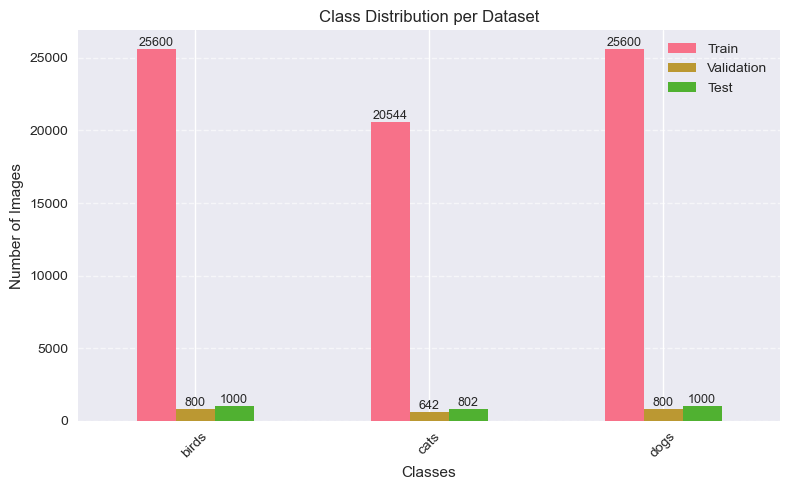

In [ ]:
from torchvision import datasets, transforms
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Klasör yolları
train_dir =r"enter path"
val_dir   = r"enter path"
test_dir  = r"enter path"

# Sadece sayım için transform önemli değil
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Datasetleri yükle
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset   = datasets.ImageFolder(val_dir, transform=transform)
test_dataset  = datasets.ImageFolder(test_dir, transform=transform)

# Fonksiyon: sınıf dağılımı al
def get_class_distribution(dataset, name="Dataset"):
    class_counts = Counter([label for _, label in dataset.samples])
    data = {dataset.classes[cls_idx]: count for cls_idx, count in class_counts.items()}
    df = pd.DataFrame.from_dict(data, orient="index", columns=[name])
    df.loc["Total"] = df.sum()
    return df

# DataFrame'leri birleştir
train_df = get_class_distribution(train_dataset, "Train")
val_df   = get_class_distribution(val_dataset, "Validation")
test_df  = get_class_distribution(test_dataset, "Test")

summary_df = train_df.join(val_df, how="outer").join(test_df, how="outer").fillna(0).astype(int)

# 📊 Tablo göster
print("\n📂 Dataset Summary\n")
print(summary_df)

# 📊 Grafik çiz (sayı etiketli)
ax = summary_df.drop("Total").plot(kind="bar", figsize=(8,5))
plt.title("Class Distribution per Dataset")
plt.ylabel("Number of Images")
plt.xlabel("Classes")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# 🔢 Sayıları barların üstüne yaz
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge", fontsize=9)

plt.tight_layout()
plt.show()
